# Clean up and extract self-report data

In [1]:
import pandas as pd
import numpy as np
import json
from scipy.stats import pearsonr as corr
from scipy.stats import ttest_1samp as tt
from scipy.stats import ttest_ind as tt2
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sr=pd.read_csv('run3_data_a.csv')
data_mf=sr

good_subs=['5e50ecfc5bac4311db8b381b', '5f78b933f653f2489f86469b', '5da730b43fc8890017b9a5bd', '5f316e50b2f8590176cb8800', '5ea06b415bd57c02b89d4511', '5d83b4c19358b400013494e8', '5e58436ebdccf5057ddd9190', '571cc797e1d2ec0012a689a0', '5cd2fa354cf69b0017a9b2f7', '5f4697ecad5ee602362af721', '5aa308f0b5e2110001c71eb5', '5dc161a2ce6a9d0cf9814d5b', '5f1475dc10e53a053e1fda1e', '5dd85601e05cad808fd62f3b', '5f85f0cab3f4e20ebf578203', '5d923f41e019d1001c713e2b', '5dc44b73900e3e31ef1e3294', '5e1e319cac30fa19d1e131fe', '5d55029618ca41001c7c3583', '5a6b6b34d5d4cb0001d64b8f', '5e75cf7b16fafe138cac64c8', '5f0f57173566650fefe59451', '5f6cd782abc13d0e70e67d6f', '5e3de55071cf2606b45c50a6', '5be1f3f38a2c8000016246e7', '5f02f1d7afde3746b6ce5117', '5e931494e2bcb364d069bc8a', '5f4d4f3a2059689f1a2c33db', '5f7620b93a2dd30771bb322e', '5b942c77b2352100016db457', '5f0c5aa0fc8e5a5afdc94761', '5ed94270ad37064ae646dfd7', '5f73ad2ae06cde12229564f1', '5c1cb46aaaf1320001426b9e', '5c34f0afffc19a0001a7da70', '5f18a5e60ce7b80ab30d90ae', '5bead3d3feaa4a000164c40c', '5ed12660a41e2603213e1f87', '5f2c16aabf114905864692f9', '5e9627e6434ee20a82a7d296', '5d8ceadadad82b0016bac50b', '5f0576c2b5b074000a8664cc', '5ea000d6e849b0000814e9d5', '597fc43e413c2300012916f1', '58fa36995214e3000193281c', '5f343b0f19d95a30e188ee9f', '5f7366fe5b5261081e3d6fb8', '5ecf68de4145c639871d90d6', '5f5a4e1f3778490d3e6d1652', '56b4b530b2de2a000632cc5f', '5900dfba92947200019aaa22', '5a82da17aa46dd00016b8f3b', '5ba42e35984ec30001c6018d', '59e5177f16ecc200016fefc1', '5f33e5bdea0471231d3fa54b', '5f4e117dbfcaa83f1b418976', '5f633d376c60233e5dfe5e47', '5efcb50255a06b097b8d5d29', '5f5a6f4dc6a95e1365660a40', '5ead973f1e0b1306ab65cf4e', '5c617d061cbdd10001407426', '5f8472e84253bf0c72d83923', '5c50b130d5172600019f156f', '5f22d73c2c28c101e9541d32', '5f53b73f18bf9a6ed513ca61', '5e9d95850b074007356d3c56', '5ee61c6204aef93753868325', '59d49132078dbe00019511c1', '5f7deaf807753f02f9cc2b2a', '5e13bbae4acfb9a08f0b94c8', '5b65b2773662a8000158c788', '5f3ed1b521b5231766f7fef5', '5ebc4f7f306af20607134cfc', '59e8f20262637600014a7e75', '5f84562b69c963086047a106', '5f1701dd85408e035eb3bd73', '5d8a62e934146e001a8ea16d', '5e2f5d67028f41527321f838', '588c98cf670d6600012bd774', '5cbdf7e839447e00017459f3', '5e7c7bf3ca18002bd9cf6eca', '5f5199d96cfa743e8c9d0541', '5d21228723c079001923a6ba', '5c34cece6288ec00016a5363', '5f7af8bd96edc70107b117aa', '5eb6b8d41cf74d5bbc04cc26', '5b07478c6f73510001fdbbda', '5cd6c6fd987ddd00187b79fd', '5ec6bb20ce3f410dcd418f20', '5e152c33814bbab3e0eb7371', '5e0cbe8919232d467b08ac4c', '5f86d7c687b0ad035967469f', '5ecbb58e19906d745d70c399', '5efc862d9cbac6036730c847', '5ec6c8ad6f911e0e87e58b1f', '56cf683331a5bc000de1d20e', '5a94f57289de8200013ecbc8', '5ed92f9ea4b0a90f5929cddb', '5c4602713d08e80001369876', '5f2c2b2e4d46190913d07955', '5f2a531e8a626e22c1f1d9ad', '5f0ff8ead672e8219f0f9357', '5ea8872b844c430f7d2be8b5', '5c506220ba50dc0001862088', '5f400938427f570ee6781225', '5cd8638310887400162dafec', '59f4847293b40c00016c9c5d', '5ee8f53008d60f24278b816e', '5af1ce4be1b5b8000148afac', '5f3556c7290d724d4ba4a449', '5c7458b0d094c900013c3bf0', '5e658181af3bd530ce98d4c5', '5f10c8dee777933f01f3d3d6', '56afc8219bf45c000d00d499', '5beb492b5324b10001c26ae8', '5c1cdb060108690001f8fe85', '5ec679a7d799ae05aa5e4747', '5ea1ac832ac60d0762c238a7', '5cbf223b47becc0013c2e355', '5f846dd4e962ce0bf61b95fb', '5968c58012e7f700013b4acc', '5f7631d94ba6c90aec43c7f4', '5ea1637e050d8e0008afdff7', '5e999e7c295393016b7c2577', '5ea82e03b5f29722e4b5835e', 'njPfksHuHfOFgIwjeW7ChL4PpjD3', '5f4d17da030fef97ee2d782e', '5de54842a7cb240cb3c34933', '5d60e3350393f90001015529', '57444be32801a2000d7a75e9', '5f6c6f566df913000af123a8', '598db6bdcceb0f0001b39763', '5f2c620abb242611c4607aa1', '55cf6a7b34e9060005e56ca2', '5ebb10a81635db0ce24f187a', '5ef4e343d0a7dd102a3c50b8', '5810f69c7d3e6d0001df29a5', '5f5c079fe585c33ee69c1263', '5d192aef6be726001a39d2f3', '5f83bd0b44cc145582b0ca01', '5c48df1f2381060001bf9fd1', '5f5f70aac2a0f3021e66c22c', '5d3dd59e791fe2001673f587', '5ecef7476b4f691684117924', '5b0abc9ce9270900013b950d', '5be7752e66e3d1000103957f', '5eb7dbeede9f986ef1cff0de', '5f76f9bc8ed0b91b34f829da', '5f8452200539fa07ac939bb8', '5ea601fe68d1210be8aac48d', '5f11d481902ff50b23166de1', '5f75f7a73bf0b60009f88e38', '5a9c1988f6dfdd0001ea9933', '5f74a934c78e6208615393b7', '5d6d6c5105e693001aa1461b', '5c9d05e72b3c77001744e8d2', '5f1de226b5c0873193a834ed', '5f462e1e8ee312262611e78b', '5d2e5d1c649703001a9c920d', '57a77b4a8eccbc0001f39fc2', '5b9d57e5737d030001ad2cbf', '5e529e9ad9a7ea2ab55835f2', '5f2d9ef399b5e709d6e09d5d', '5efd966a27e5f41e732238f5', '57acee52bfa77b0001bf31d4', '5ef8b4207d1275028bb4f9c7', '5c3f4ccd410e97000128d1cd', '5f0a414ff08fe631710e3ce8', '5f1caf3bee498903695ad126', '5f158dba6daab4067326b511', '5f7dc0a9912d5b026fc50346', '5ee64d41b067113b09098d5e', '5eca55ce7b00b50119c64518', '5e78e8c6593bf50831f704b8', '5eaa97d07eda6e01ec108107', '5f0d87c546eefe02a4733c5b', '5ec3b64297476e2171182ed6', '5ec57b52306f25563b4a11c5', '5f3bd0e50bf2cb92bfc8a141', '5abe2d5c1667e40001d8250f', '5e5e865f024e341b083e0dcd', '5b3a03a71d4b680001694793', '5a048d21df3fa800015c33a1', '5ea34772360fe42be0e09295', '5ecce8a716aee0016eab83cd', '5ebf08453796e31220358f8b', '582468295f4d1c0001c7c467', '596116d4d865d10001cd6485', '5a51f9a3eedc320001420663', '5c6d0da2d5221b000101da81', '57618e8a25224a0006d3756e', '5c3ccb06337ac90001a4a9a0']
data_mf =data_mf[data_mf.stimulus != 'Great work. You are a third of the way through the task.']
data_mf =data_mf[data_mf.stimulus != 'Great work. You are two thirds of the way through the task.']
sr=data_mf
subj_IDs = data_mf['subjectID'].str.split(';\s*', expand=True).stack().unique()
print('number of subjects: {}'.format(len(subj_IDs)))

bad_subs=[]
subs_b=[]
counter=0
current_sums=[]
current_punishments=[]
current_rewards=[]
consecutives=[]
switching=[]
sub_IDs_list=[]
versions=[]
errors_sum=[]
worry_scores_removed=[]
masq_scores_removed=[]
ocd_scores_removed=[]
percent_one_option=[]
bsu=[]
gsu=0
for sub in subj_IDs:
    if sub not in good_subs:
        bsu.append(sub)

    temp=sr[sr.subjectID==sub]
#     temp =temp[temp.stimulus.eq('You passed the quiz! Great work. The task will take about 30 minutes. Press the button to begin.').groupby(temp.subjectID).cumsum()]
    errors=temp[temp.chosen_state=='SLOW']
    s=temp[temp.reward_received=='-3.0']
    l=temp[temp.chosen_state=='1']


    temp=temp[temp.reward_received!=-3.0]
    current_sum=temp.reward_received.sum()
    punishment_sum=sum([i for i in temp.reward_received if i ==-1.0])
    reward_sum=sum([i for i in temp.reward_received if i ==1.0])
    temp=temp.reset_index(drop=True)

    bs=0


    if sub in bsu:
        temp=sr[sr.subjectID==sub]
        temp=temp[temp.reward_received!=-3.0]
        temp=temp.reset_index(drop=True)
        temp=temp[['Q_name','responses','subjectID','reward_received']]
        valid_columns=['anx_aro']
        valid_columns2=['worry']
        valid_columns3=['ocd']
        sr1=temp[temp.Q_name.isin(valid_columns)]
        sr2=temp[temp.Q_name.isin(valid_columns2)]
        sr3=temp[temp.Q_name.isin(valid_columns3)]

        sr1=sr1.reset_index(drop=True)
        sr2=sr2.reset_index(drop=True)
        sr3=sr3.reset_index(drop=True)
        rs_items_worry=[1,3,8,10,11]
        rs_dict={1:5,2:5,4:2,5:1,3:3}
        for entry in sr2.responses:
            x=json.loads(entry)

            sum_worry=0

            for key in x.keys():
                if int(key[1:])+1 in rs_items_worry:
                    sum_worry+=rs_dict[x[key]+1]
                else:
                    sum_worry+=int(x[key]+1)
            worry_scores_removed.append(sum_worry)
        for entry in sr1.responses:
            x=json.loads(entry)
            masq_sum=0
        #     print(len(x.keys()))
            for key in x.keys():
                masq_sum+=int(x[key])
            masq_scores_removed.append(masq_sum)

        for entry in sr3.responses:
            x=json.loads(entry)
            ocd_sum=0
        #     print(len(x.keys()))
            for key in x.keys():
                ocd_sum+=int(x[key])
            ocd_scores_removed.append(ocd_sum)
        sr=sr[sr.subjectID!=sub]
        bad_subs.append(sub)
        bs=1


    #total 11 bad subs from incomplete or too many errors
    try:
        if len(errors) >17:
            temp=sr[sr.subjectID==sub]
            temp=temp[temp.reward_received!=-3.0]
            temp=temp.reset_index(drop=True)
            temp=temp[['Q_name','responses','subjectID','reward_received']]
            valid_columns=['anx_aro']
            valid_columns2=['worry']
            valid_columns3=['ocd']
            sr1=temp[temp.Q_name.isin(valid_columns)]
            sr2=temp[temp.Q_name.isin(valid_columns2)]
            sr3=temp[temp.Q_name.isin(valid_columns3)]

            sr1=sr1.reset_index(drop=True)
            sr2=sr2.reset_index(drop=True)
            sr3=sr3.reset_index(drop=True)
            rs_items_worry=[1,3,8,10,11]
            rs_dict={1:5,2:5,4:2,5:1,3:3}
            for entry in sr2.responses:
                x=json.loads(entry)

                sum_worry=0

                for key in x.keys():
                    if int(key[1:])+1 in rs_items_worry:
                        sum_worry+=rs_dict[x[key]+1]
                    else:
                        sum_worry+=int(x[key]+1)
                worry_scores_removed.append(sum_worry)
            for entry in sr1.responses:
                x=json.loads(entry)
                masq_sum=0
            #     print(len(x.keys()))
                for key in x.keys():
                    masq_sum+=int(x[key])
                masq_scores_removed.append(masq_sum)

            for entry in sr3.responses:
                x=json.loads(entry)
                ocd_sum=0
            #     print(len(x.keys()))
                for key in x.keys():
                    ocd_sum+=int(x[key])
                ocd_scores_removed.append(ocd_sum)
            #4 more than high MF subs
#             if sub not in high_mf_subs:
            subs_b.append(sub)
          #

            bs=1
            sr=sr[sr.subjectID!=sub]
    except:
        er_check='already_removed_sub'
    try:
        if len(temp)<141:
            
            if len(temp)>10:
                if sub not in subs_b:
                    temp=temp[temp.reward_received!=-3.0]
                    temp=temp.reset_index(drop=True)
                    temp=temp[['Q_name','responses','subjectID','reward_received']]
                    valid_columns=['anx_aro']
                    valid_columns2=['worry']
                    valid_columns3=['ocd']
                    sr1=temp[temp.Q_name.isin(valid_columns)]
                    sr2=temp[temp.Q_name.isin(valid_columns2)]
                    sr3=temp[temp.Q_name.isin(valid_columns3)]

                    sr1=sr1.reset_index(drop=True)
                    sr2=sr2.reset_index(drop=True)
                    sr3=sr3.reset_index(drop=True)
                    rs_items_worry=[1,3,8,10,11]
                    rs_dict={1:5,2:5,4:2,5:1,3:3}
                    for entry in sr2.responses:
                        x=json.loads(entry)

                        sum_worry=0

                        for key in x.keys():
                            if int(key[1:])+1 in rs_items_worry:
                                sum_worry+=rs_dict[x[key]+1]
                            else:
                                sum_worry+=int(x[key]+1)
                        worry_scores_removed.append(sum_worry)
                    for entry in sr1.responses:
                        x=json.loads(entry)
                        masq_sum=0
                    #     print(len(x.keys()))
                        for key in x.keys():
                            masq_sum+=int(x[key])
                        masq_scores_removed.append(masq_sum)

                    for entry in sr3.responses:
                        x=json.loads(entry)
                        ocd_sum=0
                    #     print(len(x.keys()))
                        for key in x.keys():
                            ocd_sum+=int(x[key])
                        ocd_scores_removed.append(ocd_sum)
                subs_b.append(sub)

            sr=sr[sr.subjectID!=sub]
            bs=1
    except:
        print('already_removed_sub')
    if bs==0:
        gsu+=1
        print('good sub number: {}'.format(gsu))
        if temp.version[0].endswith('b'):
            versions.append(1)
        else:
            versions.append(0)
        if len(l)<len(temp)/2.0:
            percent_one_option.append((len(temp)-len(l))/len(temp))
        else:
            percent_one_option.append(len(l)/len(temp))

        consec=0
        switches=0
        for i in range(len(temp.chosen_state)):
            if i==0:
                x=0

            else:
                if temp.chosen_state[i]==temp.chosen_state[i-1]:
                    consec+=1
                else:
                    switches+=1


        consecutives.append(consec)
        current_sums.append(current_sum)
        current_punishments.append(punishment_sum)
        current_rewards.append(reward_sum)
        sub_IDs_list.append(sub)
        errors_sum.append(len(errors))

        

subsu=[]
for sub in subs_b:
    if sub not in subsu:
        subsu.append(sub)
print('this many bad subs: {}'.format(len(subsu)))
print('mean OCD scores removed subjects: {}, sd = {}'.format(np.mean(ocd_scores_removed),np.std(ocd_scores_removed)))
print('mean masq scores removed subjects: {}, sd = {}'.format(np.mean(masq_scores_removed),np.std(masq_scores_removed)))
print('mean worry scores removed subjects: {}, sd = {}'.format(np.mean(worry_scores_removed),np.std(worry_scores_removed)))

sr=sr[['Q_name','responses','subjectID','reward_received','safe_first']]
valid_columns=['anx_aro']
valid_columns2=['worry']
valid_columns3=['ocd']
sr1=sr[sr.Q_name.isin(valid_columns)]
print(len(sr1))
print(len(current_sums))
sr1['rewards']=current_sums
sr1['just_rewards']=current_rewards
sr1['just_punishments']=current_punishments
sr1['errors']=errors_sum
sr1['consecutives']=consecutives
sr1['percent_one_option']=percent_one_option
sr1['version']=versions
print(len(sr1))
sr2=sr[sr.Q_name.isin(valid_columns2)]
sr3=sr[sr.Q_name.isin(valid_columns3)]


sr1=sr1.reset_index(drop=True)
sr2=sr2.reset_index(drop=True)
sr3=sr3.reset_index(drop=True)



number of subjects: 271
good sub number: 1
good sub number: 2
good sub number: 3
good sub number: 4
good sub number: 5
good sub number: 6
good sub number: 7
good sub number: 8
good sub number: 9
good sub number: 10
good sub number: 11
good sub number: 12
good sub number: 13
good sub number: 14
good sub number: 15
good sub number: 16
good sub number: 17
good sub number: 18
good sub number: 19
good sub number: 20
good sub number: 21
good sub number: 22
good sub number: 23
good sub number: 24
good sub number: 25
good sub number: 26
good sub number: 27
good sub number: 28
good sub number: 29
good sub number: 30
good sub number: 31
good sub number: 32
good sub number: 33
good sub number: 34
good sub number: 35
good sub number: 36
good sub number: 37
good sub number: 38
good sub number: 39
good sub number: 40
good sub number: 41
good sub number: 42
good sub number: 43
good sub number: 44
good sub number: 45
good sub number: 46
good sub number: 47
good sub number: 48
good sub number: 49
good 

<ipython-input-1-1c803cdf7cfa>:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr1['rewards']=current_sums
<ipython-input-1-1c803cdf7cfa>:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr1['just_rewards']=current_rewards
<ipython-input-1-1c803cdf7cfa>:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

## Reset indices in self report data to match ordering in modelling 

In [2]:
# subs_model=[['5ba42e35984ec30001c6018d'], ['5f0576c2b5b074000a8664cc'], ['5e5e865f024e341b083e0dcd'], ['5eca55ce7b00b50119c64518'], ['5ea34772360fe42be0e09295'], ['5f2d9ef399b5e709d6e09d5d'], ['5f7dc0a9912d5b026fc50346'], ['5b9d57e5737d030001ad2cbf'], ['5f7620b93a2dd30771bb322e'], ['5beb492b5324b10001c26ae8'], ['5efd966a27e5f41e732238f5'], ['5e529e9ad9a7ea2ab55835f2'], ['5c9d05e72b3c77001744e8d2'], ['5abe2d5c1667e40001d8250f'], ['5a048d21df3fa800015c33a1'], ['5be1f3f38a2c8000016246e7'], ['5aa308f0b5e2110001c71eb5'], ['5e931494e2bcb364d069bc8a'], ['5e9627e6434ee20a82a7d296'], ['5900dfba92947200019aaa22'], ['5dc161a2ce6a9d0cf9814d5b'], ['5f78b933f653f2489f86469b'], ['5eaa97d07eda6e01ec108107'], ['5d60e3350393f90001015529'], ['5e3de55071cf2606b45c50a6'], ['5f1475dc10e53a053e1fda1e'], ['5e50ecfc5bac4311db8b381b'], ['5cd2fa354cf69b0017a9b2f7'], ['5f4d4f3a2059689f1a2c33db'], ['5f2c16aabf114905864692f9'], ['5a82da17aa46dd00016b8f3b'], ['5ea000d6e849b0000814e9d5'], ['5b39f4f71d4b680001694617'], ['5ee64d41b067113b09098d5e'], ['5be7752e66e3d1000103957f'], ['5c4602713d08e80001369876'], ['5c7458b0d094c900013c3bf0'], ['5ed92f9ea4b0a90f5929cddb'], ['5c59d7eef685da000181d28c'], ['5e13bbae4acfb9a08f0b94c8'], ['5f33e5bdea0471231d3fa54b'], ['5f3ed1b521b5231766f7fef5'], ['5eb6b8d41cf74d5bbc04cc26'], ['5a9c1988f6dfdd0001ea9933'], ['5f11d481902ff50b23166de1'], ['5b65b2773662a8000158c788'], ['59e5177f16ecc200016fefc1'], ['5ebc4f7f306af20607134cfc'], ['5f7af8bd96edc70107b117aa'], ['5e658181af3bd530ce98d4c5'], ['5a94f57289de8200013ecbc8'], ['5f10c8dee777933f01f3d3d6'], ['5c48df1f2381060001bf9fd1'], ['5f74a934c78e6208615393b7'], ['5ecef7476b4f691684117924'], ['598db6bdcceb0f0001b39763'], ['5f51093faa1c4e2d3b82b0a9'], ['56afc8219bf45c000d00d499'], ['5f3a96015cb42d0cf9901e47'], ['5f2335c48a8d300cc838896a'], ['5f3556c7290d724d4ba4a449'], ['55cf6a7b34e9060005e56ca2'], ['5f7631d94ba6c90aec43c7f4'], ['5f6c6f566df913000af123a8'], ['5ea1637e050d8e0008afdff7'], ['5d6d6c5105e693001aa1461b'], ['5d3dd59e791fe2001673f587'], ['5ead973f1e0b1306ab65cf4e'], ['5b07478c6f73510001fdbbda'], ['5ee8f53008d60f24278b816e'], ['5f2a531e8a626e22c1f1d9ad'], ['5f633d376c60233e5dfe5e47'], ['59d49132078dbe00019511c1'], ['5f2c620abb242611c4607aa1'], ['5f53b73f18bf9a6ed513ca61'], ['59e8f20262637600014a7e75'], ['5f4e117dbfcaa83f1b418976'], ['5f7deaf807753f02f9cc2b2a'], ['5cd6c6fd987ddd00187b79fd'], ['56cf683331a5bc000de1d20e'], ['5af1ce4be1b5b8000148afac'], ['5f2c2b2e4d46190913d07955'], ['5e999e7c295393016b7c2577'], ['57444be32801a2000d7a75e9'], ['59f4847293b40c00016c9c5d'], ['5ef4e343d0a7dd102a3c50b8'], ['5d192aef6be726001a39d2f3'], ['5ea601fe68d1210be8aac48d'], ['5eb7dbeede9f986ef1cff0de'], ['njPfksHuHfOFgIwjeW7ChL4PpjD3'], ['5ec679a7d799ae05aa5e4747'], ['5f846dd4e962ce0bf61b95fb'], ['5f86d7c687b0ad035967469f'], ['5f4d17da030fef97ee2d782e'], ['5ea1ac832ac60d0762c238a7'], ['5cbf223b47becc0013c2e355'], ['5ebb10a81635db0ce24f187a'], ['5f83bd0b44cc145582b0ca01'], ['5f8452200539fa07ac939bb8'], ['5f76f9bc8ed0b91b34f829da'], ['5d8a62e934146e001a8ea16d'], ['5ec6bb20ce3f410dcd418f20'], ['5ecbb58e19906d745d70c399'], ['5ea8872b844c430f7d2be8b5'], ['5cd8638310887400162dafec'], ['588c98cf670d6600012bd774'], ['5f22d73c2c28c101e9541d32'], ['5c617d061cbdd10001407426'], ['5810f69c7d3e6d0001df29a5'], ['5f5c079fe585c33ee69c1263'], ['5e2f5d67028f41527321f838'], ['5cbdf7e839447e00017459f3'], ['5c50b130d5172600019f156f'], ['5f8472e84253bf0c72d83923'], ['5e0cbe8919232d467b08ac4c'], ['5c506220ba50dc0001862088'], ['5f400938427f570ee6781225'], ['5de54842a7cb240cb3c34933'], ['5ea82e03b5f29722e4b5835e'], ['5f5a6f4dc6a95e1365660a40'], ['5f343b0f19d95a30e188ee9f'], ['5ed94270ad37064ae646dfd7'], ['5f73ad2ae06cde12229564f1'], ['5ea06b415bd57c02b89d4511'], ['5d83b4c19358b400013494e8'], ['5e1e319cac30fa19d1e131fe'], ['5dc44b73900e3e31ef1e3294'], ['596116d4d865d10001cd6485'], ['5a51f9a3eedc320001420663'], ['5e9d95850b074007356d3c56'], ['5d21228723c079001923a6ba'], ['5f84562b69c963086047a106'], ['5b0abc9ce9270900013b950d'], ['5f75f7a73bf0b60009f88e38'], ['5d8ceadadad82b0016bac50b'], ['5efcb50255a06b097b8d5d29'], ['5ee61c6204aef93753868325'], ['5f5199d96cfa743e8c9d0541'], ['5f1701dd85408e035eb3bd73'], ['5f0ff8ead672e8219f0f9357'], ['5e152c33814bbab3e0eb7371'], ['5ec6c8ad6f911e0e87e58b1f'], ['5968c58012e7f700013b4acc'], ['5c1cdb060108690001f8fe85'], ['5c34f0afffc19a0001a7da70'], ['58fa36995214e3000193281c'], ['5f7366fe5b5261081e3d6fb8'], ['5dd85601e05cad808fd62f3b'], ['5e75cf7b16fafe138cac64c8'], ['5e58436ebdccf5057ddd9190'], ['5f316e50b2f8590176cb8800'], ['5f0d87c546eefe02a4733c5b'], ['5f4697ecad5ee602362af721'], ['5f85f0cab3f4e20ebf578203'], ['5a6b6b34d5d4cb0001d64b8f'], ['5da730b43fc8890017b9a5bd'], ['5c1cb46aaaf1320001426b9e'], ['5cb213bb822bcd0001fea2ad'], ['5ecf68de4145c639871d90d6'], ['5c3f4ccd410e97000128d1cd'], ['5ef8b4207d1275028bb4f9c7'], ['5f02f1d7afde3746b6ce5117'], ['5f3bd0e50bf2cb92bfc8a141'], ['5c6d0da2d5221b000101da81'], ['582468295f4d1c0001c7c467'], ['57acee52bfa77b0001bf31d4'], ['5d2e5d1c649703001a9c920d'], ['57a77b4a8eccbc0001f39fc2'], ['5f18a5e60ce7b80ab30d90ae'], ['5f0c5aa0fc8e5a5afdc94761'], ['5f0a414ff08fe631710e3ce8'], ['5f462e1e8ee312262611e78b'], ['5ec3b64297476e2171182ed6'], ['5ec57b52306f25563b4a11c5'], ['5ebf08453796e31220358f8b'], ['5d923f41e019d1001c713e2b'], ['5d55029618ca41001c7c3583'], ['5b3a03a71d4b680001694793'], ['5f5a4e1f3778490d3e6d1652'], ['597fc43e413c2300012916f1'], ['5b942c77b2352100016db457'], ['5ed12660a41e2603213e1f87'], ['571cc797e1d2ec0012a689a0'], ['5f6cd782abc13d0e70e67d6f'], ['5ecce8a716aee0016eab83cd'], ['57618e8a25224a0006d3756e'], ['5c3ccb06337ac90001a4a9a0'], ['5f0f57173566650fefe59451'], ['56b4b530b2de2a000632cc5f'], ['5bead3d3feaa4a000164c40c'], ['5ec92a7a5ed12a0367a0f95a'], ['5f1de226b5c0873193a834ed']]
subs_model=['5e50ecfc5bac4311db8b381b', '5f78b933f653f2489f86469b', '5da730b43fc8890017b9a5bd', '5f316e50b2f8590176cb8800', '5ea06b415bd57c02b89d4511', '5d83b4c19358b400013494e8', '5e58436ebdccf5057ddd9190', '571cc797e1d2ec0012a689a0', '5cd2fa354cf69b0017a9b2f7', '5f4697ecad5ee602362af721', '5aa308f0b5e2110001c71eb5', '5dc161a2ce6a9d0cf9814d5b', '5f1475dc10e53a053e1fda1e', '5dd85601e05cad808fd62f3b', '5f85f0cab3f4e20ebf578203', '5d923f41e019d1001c713e2b', '5dc44b73900e3e31ef1e3294', '5e1e319cac30fa19d1e131fe', '5d55029618ca41001c7c3583', '5a6b6b34d5d4cb0001d64b8f', '5e75cf7b16fafe138cac64c8', '5f0f57173566650fefe59451', '5f6cd782abc13d0e70e67d6f', '5e3de55071cf2606b45c50a6', '5be1f3f38a2c8000016246e7', '5f02f1d7afde3746b6ce5117', '5e931494e2bcb364d069bc8a', '5f4d4f3a2059689f1a2c33db', '5f7620b93a2dd30771bb322e', '5b942c77b2352100016db457', '5f0c5aa0fc8e5a5afdc94761', '5ed94270ad37064ae646dfd7', '5f73ad2ae06cde12229564f1', '5c1cb46aaaf1320001426b9e', '5c34f0afffc19a0001a7da70', '5f18a5e60ce7b80ab30d90ae', '5bead3d3feaa4a000164c40c', '5ed12660a41e2603213e1f87', '5f2c16aabf114905864692f9', '5e9627e6434ee20a82a7d296', '5d8ceadadad82b0016bac50b', '5f0576c2b5b074000a8664cc', '5ea000d6e849b0000814e9d5', '597fc43e413c2300012916f1', '58fa36995214e3000193281c', '5f343b0f19d95a30e188ee9f', '5f7366fe5b5261081e3d6fb8', '5ecf68de4145c639871d90d6', '5f5a4e1f3778490d3e6d1652', '56b4b530b2de2a000632cc5f', '5900dfba92947200019aaa22', '5a82da17aa46dd00016b8f3b', '5ba42e35984ec30001c6018d', '59e5177f16ecc200016fefc1', '5f33e5bdea0471231d3fa54b', '5f4e117dbfcaa83f1b418976', '5f633d376c60233e5dfe5e47', '5efcb50255a06b097b8d5d29', '5f5a6f4dc6a95e1365660a40', '5ead973f1e0b1306ab65cf4e', '5c617d061cbdd10001407426', '5f8472e84253bf0c72d83923', '5c50b130d5172600019f156f', '5f22d73c2c28c101e9541d32', '5f53b73f18bf9a6ed513ca61', '5e9d95850b074007356d3c56', '5ee61c6204aef93753868325', '59d49132078dbe00019511c1', '5f7deaf807753f02f9cc2b2a', '5e13bbae4acfb9a08f0b94c8', '5b65b2773662a8000158c788', '5f3ed1b521b5231766f7fef5', '5ebc4f7f306af20607134cfc', '59e8f20262637600014a7e75', '5f84562b69c963086047a106', '5f1701dd85408e035eb3bd73', '5d8a62e934146e001a8ea16d', '5e2f5d67028f41527321f838', '588c98cf670d6600012bd774', '5cbdf7e839447e00017459f3', '5e7c7bf3ca18002bd9cf6eca', '5f5199d96cfa743e8c9d0541', '5d21228723c079001923a6ba', '5c34cece6288ec00016a5363', '5f7af8bd96edc70107b117aa', '5eb6b8d41cf74d5bbc04cc26', '5b07478c6f73510001fdbbda', '5cd6c6fd987ddd00187b79fd', '5ec6bb20ce3f410dcd418f20', '5e152c33814bbab3e0eb7371', '5e0cbe8919232d467b08ac4c', '5f86d7c687b0ad035967469f', '5ecbb58e19906d745d70c399', '5efc862d9cbac6036730c847', '5ec6c8ad6f911e0e87e58b1f', '56cf683331a5bc000de1d20e', '5a94f57289de8200013ecbc8', '5ed92f9ea4b0a90f5929cddb', '5c4602713d08e80001369876', '5f2c2b2e4d46190913d07955', '5f2a531e8a626e22c1f1d9ad', '5f0ff8ead672e8219f0f9357', '5ea8872b844c430f7d2be8b5', '5c506220ba50dc0001862088', '5f400938427f570ee6781225', '5cd8638310887400162dafec', '59f4847293b40c00016c9c5d', '5ee8f53008d60f24278b816e', '5af1ce4be1b5b8000148afac', '5f3556c7290d724d4ba4a449', '5c7458b0d094c900013c3bf0', '5e658181af3bd530ce98d4c5', '5f10c8dee777933f01f3d3d6', '56afc8219bf45c000d00d499', '5beb492b5324b10001c26ae8', '5c1cdb060108690001f8fe85', '5ec679a7d799ae05aa5e4747', '5ea1ac832ac60d0762c238a7', '5cbf223b47becc0013c2e355', '5f846dd4e962ce0bf61b95fb', '5968c58012e7f700013b4acc', '5f7631d94ba6c90aec43c7f4', '5ea1637e050d8e0008afdff7', '5e999e7c295393016b7c2577', '5ea82e03b5f29722e4b5835e', 'njPfksHuHfOFgIwjeW7ChL4PpjD3', '5f4d17da030fef97ee2d782e', '5de54842a7cb240cb3c34933', '5d60e3350393f90001015529', '57444be32801a2000d7a75e9', '5f6c6f566df913000af123a8', '598db6bdcceb0f0001b39763', '5f2c620abb242611c4607aa1', '55cf6a7b34e9060005e56ca2', '5ebb10a81635db0ce24f187a', '5ef4e343d0a7dd102a3c50b8', '5810f69c7d3e6d0001df29a5', '5f5c079fe585c33ee69c1263', '5d192aef6be726001a39d2f3', '5f83bd0b44cc145582b0ca01', '5c48df1f2381060001bf9fd1', '5f5f70aac2a0f3021e66c22c', '5d3dd59e791fe2001673f587', '5ecef7476b4f691684117924', '5b0abc9ce9270900013b950d', '5be7752e66e3d1000103957f', '5eb7dbeede9f986ef1cff0de', '5f76f9bc8ed0b91b34f829da', '5f8452200539fa07ac939bb8', '5ea601fe68d1210be8aac48d', '5f11d481902ff50b23166de1', '5f75f7a73bf0b60009f88e38', '5a9c1988f6dfdd0001ea9933', '5f74a934c78e6208615393b7', '5d6d6c5105e693001aa1461b', '5c9d05e72b3c77001744e8d2', '5f1de226b5c0873193a834ed', '5f462e1e8ee312262611e78b', '5d2e5d1c649703001a9c920d', '57a77b4a8eccbc0001f39fc2', '5b9d57e5737d030001ad2cbf', '5e529e9ad9a7ea2ab55835f2', '5f2d9ef399b5e709d6e09d5d', '5efd966a27e5f41e732238f5', '57acee52bfa77b0001bf31d4', '5ef8b4207d1275028bb4f9c7', '5c3f4ccd410e97000128d1cd', '5f0a414ff08fe631710e3ce8', '5f1caf3bee498903695ad126', '5f158dba6daab4067326b511', '5f7dc0a9912d5b026fc50346', '5ee64d41b067113b09098d5e', '5eca55ce7b00b50119c64518', '5e78e8c6593bf50831f704b8', '5eaa97d07eda6e01ec108107', '5f0d87c546eefe02a4733c5b', '5ec3b64297476e2171182ed6', '5ec57b52306f25563b4a11c5', '5f3bd0e50bf2cb92bfc8a141', '5abe2d5c1667e40001d8250f', '5e5e865f024e341b083e0dcd', '5b3a03a71d4b680001694793', '5a048d21df3fa800015c33a1', '5ea34772360fe42be0e09295', '5ecce8a716aee0016eab83cd', '5ebf08453796e31220358f8b', '582468295f4d1c0001c7c467', '596116d4d865d10001cd6485', '5a51f9a3eedc320001420663', '5c6d0da2d5221b000101da81', '57618e8a25224a0006d3756e', '5c3ccb06337ac90001a4a9a0']
# subs_model=[sub[0] for sub in subs_model]
indices_sub_model=[]
smod=[]
cou=0
for i in subs_model:
    if sr1.subjectID[cou] in smod:
        print(sr1.subjectID[cou])
    else:
        smod.append(sr1.subjectID[cou])
    cou+=1
    counter=0
    for j in sr1.subjectID:
        if j==i:
            indices_sub_model.append(counter)
        counter+=1

subs_data1=sr1.reindex(indices_sub_model)
subs_data1=subs_data1.reset_index(drop=True)

subs_data2=sr2.reindex(indices_sub_model)
subs_data2=subs_data2.reset_index(drop=True)

subs_data3=sr3.reindex(indices_sub_model)
subs_data3=subs_data3.reset_index(drop=True)

# print(len(subs_data1.subjectID))
for i in range(len(subs_model)):
    if subs_model[i]==subs_data1.subjectID[i]:
        print('True')
#     else:
#         print('modelling: {}, self-report: {}'.format(subs_model[i],subs_data1.subjectID[i]))
        
    
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Self report scoring and comparison between removed and retained subjects

mean OCD scores removed subjects: 22.454545454545453, sd = 15.340757575009347
mean OCD scores subjects: 20.526041666666668, sd = 12.907093856929887
diff in OCD scores retained vs. removed samples: t=-0.9680372101652986,p=0.33495636362173076

mean masq scores removed subjects: 6.3875, sd = 7.4841394795928275
mean masq scores subjects: 5.739583333333333, sd = 6.028136790063926
diff in anx aro scores retained vs. removed samples: t=-0.6832410593519808,p=0.4957352508720029

mean worry scores removed subjects: 52.756410256410255, sd = 17.446758495076836
mean worry scores subjects: 54.114583333333336, sd = 16.25023704421125
diff in worry scores retained vs. removed samples: t=0.5879771081001837,p=0.5575395972495525
length worry 192


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


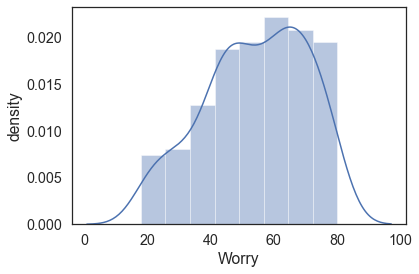

worry mean and sd
54.114583333333336
16.25023704421125
worry median: 56.0



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


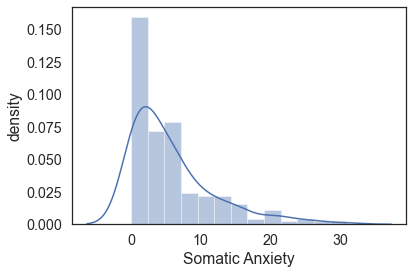

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


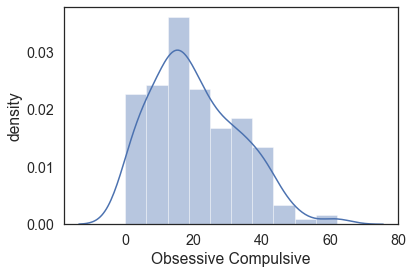

ocd and masq 0.33476616391972314 , pval 2.074544207016335e-06
ocd and worry 0.4996326733862831 , pval 1.6136198697098545e-13
worry and masq 0.3289151063200664 , pval 3.1916501501664107e-06


In [3]:
import json
from scipy.stats import spearmanr as corr
from scipy.stats import ttest_1samp as tt
from scipy.stats import ttest_ind as tt2
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.3, color_codes=True, rc=None)

# GET SELF REPORT DATA AND SCORE IT
worry_scores=[]
masq_scores=[]
ocd_scores=[]
rs_items_worry=[1,3,8,10,11]
rs_dict={1:5,2:5,4:2,5:1,3:3}
for entry in subs_data2.responses:
    x=json.loads(entry)

    sum_worry=0
    
    for key in x.keys():
        if int(key[1:])+1 in rs_items_worry:
            sum_worry+=rs_dict[x[key]+1]
        else:
            sum_worry+=int(x[key]+1)
    worry_scores.append(sum_worry)
for entry in subs_data1.responses:
    x=json.loads(entry)
    masq_sum=0
#     print(len(x.keys()))
    for key in x.keys():
        masq_sum+=int(x[key])
    masq_scores.append(masq_sum)

for entry in subs_data3.responses:
    x=json.loads(entry)
    ocd_sum=0
#     print(len(x.keys()))
    for key in x.keys():
        ocd_sum+=int(x[key])
    ocd_scores.append(ocd_sum)
    
# DATA LOAD
rews=subs_data1.rewards.tolist()
jrews=subs_data1.just_rewards.tolist()
jpunishments=subs_data1.just_punishments.tolist()
errs=subs_data1.errors.tolist()
versions=subs_data1.version.tolist()
safe_firsts=subs_data1.safe_first.tolist()
safe_first=[1 if x==True else -1 for x in safe_firsts]

print('mean OCD scores removed subjects: {}, sd = {}'.format(np.mean(ocd_scores_removed),np.std(ocd_scores_removed)))
print('mean OCD scores subjects: {}, sd = {}'.format(np.mean(ocd_scores),np.std(ocd_scores)))
t,p=tt2(ocd_scores,ocd_scores_removed,equal_var=False)
print('diff in OCD scores retained vs. removed samples: t={},p={}'.format(t,p))
print('')
print('mean masq scores removed subjects: {}, sd = {}'.format(np.mean(masq_scores_removed),np.std(masq_scores_removed)))
print('mean masq scores subjects: {}, sd = {}'.format(np.mean(masq_scores),np.std(masq_scores)))
t,p=tt2(masq_scores,masq_scores_removed,equal_var=False)
print('diff in anx aro scores retained vs. removed samples: t={},p={}'.format(t,p))
print('')
print('mean worry scores removed subjects: {}, sd = {}'.format(np.mean(worry_scores_removed),np.std(worry_scores_removed)))
print('mean worry scores subjects: {}, sd = {}'.format(np.mean(worry_scores),np.std(worry_scores)))

t,p=tt2(worry_scores,worry_scores_removed,equal_var=False)
print('diff in worry scores retained vs. removed samples: t={},p={}'.format(t,p))

print('length worry {}'.format(len(worry_scores)))
# plot self report distributions

temp_f=pd.Series(worry_scores,name='Worry')
sns.distplot(temp_f)
# plt.savefig("dist_worry.png",bbox_inches='tight', dpi=300)
plt.ylabel('density')
plt.show()
print('worry mean and sd')
print(np.mean(worry_scores))
print(np.std(worry_scores))
print('worry median: {}'.format(np.median(worry_scores)))
print('')
# temp_f=pd.Series(np.log(worry_scores),name=' log worry')
# sns.distplot(temp_f)
# plt.show()

temp_f=pd.Series(masq_scores,name='Somatic Anxiety')
sns.distplot(temp_f)
plt.ylabel('density')
# plt.savefig("dist_aa.png",bbox_inches='tight', dpi=300)

plt.show()


# temp_f=pd.Series(np.log(masq_scores+1),name='log anx aro')
# sns.distplot(temp_f)
# plt.show()

temp_f=pd.Series(ocd_scores,name='Obsessive Compulsive')
sns.distplot(temp_f)
# plt.savefig("dist_ocd.png",bbox_inches='tight', dpi=300)
plt.ylabel('density')

plt.show()

r,p=corr(ocd_scores,masq_scores)
print('ocd and masq {} , pval {}'.format(r,p))
r,p=corr(ocd_scores,worry_scores)
print('ocd and worry {} , pval {}'.format(r,p))
r,p=corr(worry_scores,masq_scores)
print('worry and masq {} , pval {}'.format(r,p))
# temp_f=pd.Series(np.log(ocd_scores+1),name='log ocd')
# sns.distplot(temp_f)
# plt.show()

# Analysis of parameters derived from winning computational model

mean OCD scores removed subjects: 22.454545454545453, sd = 15.340757575009347
mean OCD scores subjects: 20.526041666666668, sd = 12.907093856929887
diff in OCD scores retained vs. removed samples: t=-0.9680372101652986,p=0.33495636362173076

mean masq scores removed subjects: 6.3875, sd = 7.4841394795928275
mean masq scores subjects: 5.739583333333333, sd = 6.028136790063926
diff in anx aro scores retained vs. removed samples: t=-0.6832410593519808,p=0.4957352508720029

mean worry scores removed subjects: 52.756410256410255, sd = 17.446758495076836
mean worry scores subjects: 54.114583333333336, sd = 16.25023704421125
diff in worry scores retained vs. removed samples: t=0.5879771081001837,p=0.5575395972495525
length worry 192


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


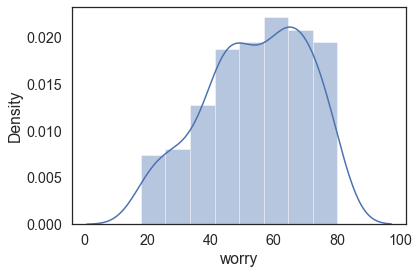

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


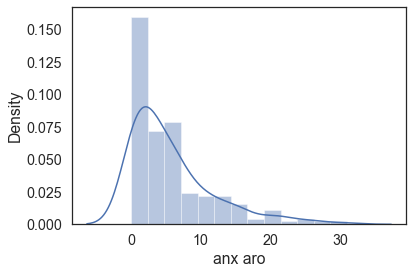

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


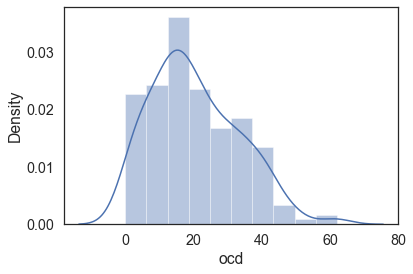

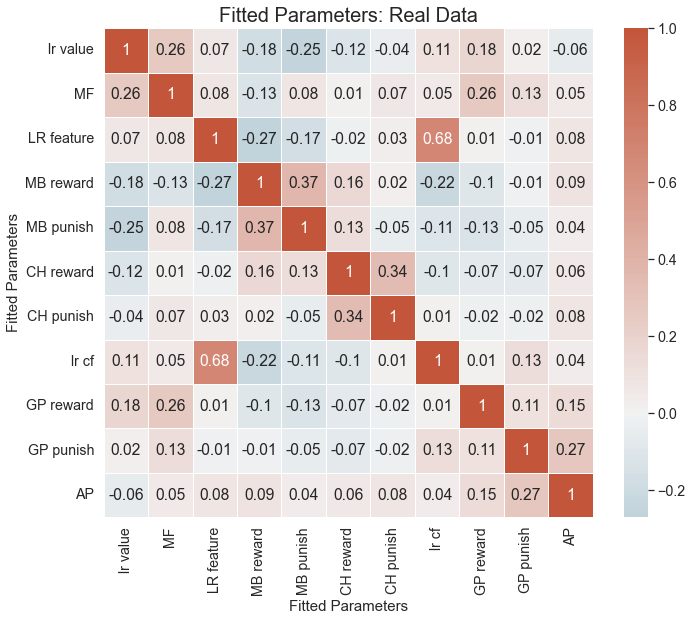

beta pred 1.9597519830963794 m, 2.3646289746217803 sd
beta safe 4.050026713985056 m, 4.572662246460518 sd
lr features 0.1926376783479189 m, 0.20352774449081024 sd
lr features 0.10282563601522673 med, 0.20352774449081024 sd
lr cf 0.14214858031154837 m, 0.20352774449081024 sd
lr cf 0.06044315244974868 med, 0.20352774449081024 sd
MEDIAN DIFF PRED AND RWD MB: 1.183435102254266
beta pred change mean -0.13196660452679684, SD 0.6142057567623129 
beta safe change mean 0.4996589071076723, SD 0.56225022696088 
beta GI pred: med0.6790228305015384, SD 0.8216513822196082
beta GI rew: med0.46468809778034476, SD 0.8333919790874841
beta GI pred: m0.9356728631199612, SD 0.8216513822196082
beta GI rew: m0.7388213770054076, SD 0.8333919790874841
stick 0.11762732608810701 med, 0.5111643598717737 sd
stick 0.13087642519892084 m, 0.5111643598717737 sd
beta MF 0.6268802705850888 m, 0.40905264264852964 sd
beta MF 0.5200624975241279 med, 0.40905264264852964 sd
beta pred 1.1257985828467658 med, 2.364628974621780

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


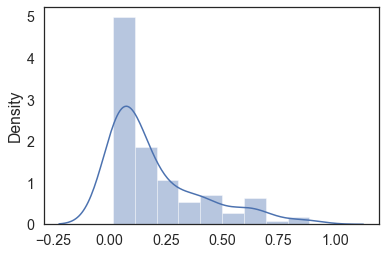

high worry LRS plot


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


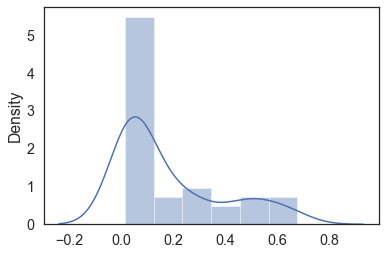

t : 0.5635755493551894, p: 0.5737075704339669 diff worry lrs

mean low ocd: 0.21816296133600993, mean high ocd: 0.16183130232780907
median low ocd: 0.13613938701029643, median high ocd: 0.07163801611061758
mean low ocd ZSCORE (<=-1): 0.20164631882989034, mean high ocd: 0.14762335815191716
median low ocd ZSCORE (>=1): 0.11939268907565251, median high ocd: 0.06236725395686028

t : 1.9174343095006543, p: 0.05668272992545634 diff ocd lrs



t : -0.06647933382103327, p: 0.9470661109899221 diff ORDER SAFE for SAFE PRED

mean low worry: 4.061924519397733, mean high worry: 4.031866905723603
t : 0.04430971744589461, p: 0.9647040590782616 diff worry rew

mean low ocd: 4.09098168051586, mean high ocd: 4.000598306103052
t : 0.13563454014850496, p: 0.8922537898117312 diff ocd rew

4.050026713985056 4.572662246460518 m sd for rew

mean low worry: 0.4741693841497838, mean high worry: 0.5385639684644494
t : -0.7732382323127739, p: 0.44034232447270705 diff worry change safe
t : -1.406501481641218, p: 0

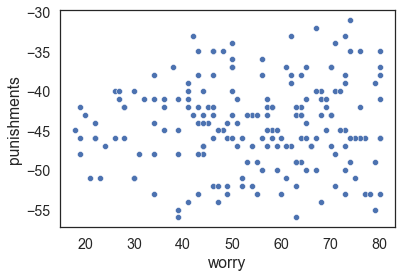

correl worry and punishments: 0.024544183236008633, p: 0.7354202486886899

correl worry and rewards: 0.017658697490773673, p: 0.8079223172102739

mean low worry: 47.16379310344828, mean high worry: 47.73684210526316 REWARDS
t : -0.6760325388320156, p: 0.4998420304669904 diff worry rewards
t : -0.6306033651331666, p: 0.5290576543648535 diff ocd change beta_mf

0.6268802705850888 0.40905264264852964 m sd for MF
t : -1.406501481641218, p: 0.16120872869477826 diff ocd change safe


mean low worry: 0.8560620321897751, mean high worry: 1.0571841313818244
median low worry: 0.6555516982305049, median high worry: 0.7306658156319743
t : -1.6619484889323337, p: 0.09817207106955984 diff worry betas_rfi_predator
t : 0.6772583207612042, p: 0.4990658581877462 diff ocd  betas_rfi_predator


mean low worry: 0.6618657438289081, mean high worry: 0.8562799750116435
t : -1.582831579397016, p: 0.11512298106082287 diff worry betas_rfi_reward
t : 0.17207315938480502, p: 0.8635631560537318 diff ocd  betas_rfi_

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


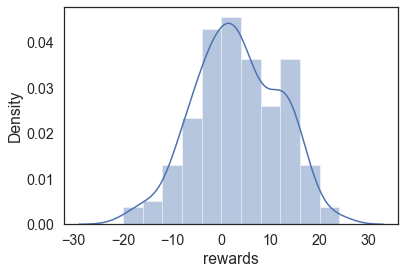

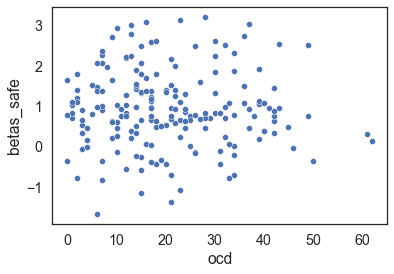

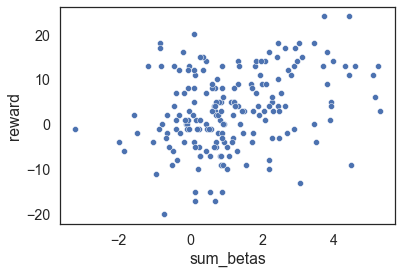

correl sum betas and reward earned: 0.29794386773327003, p: 2.702413998325488e-05




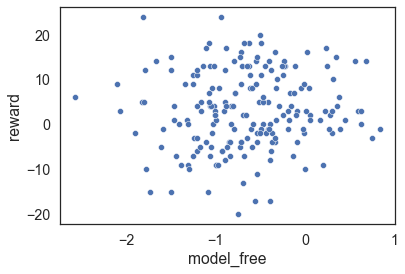

correl model free and reward earned: 0.08576677038273303, p: 0.23687268403562786




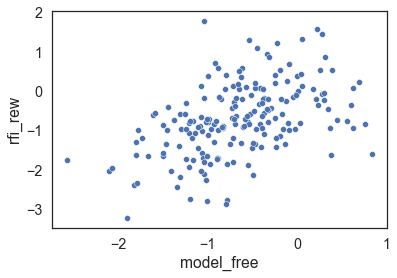

correl model free and RFI rew earned: 0.4986114125274666, p: 1.8393795769294262e-13




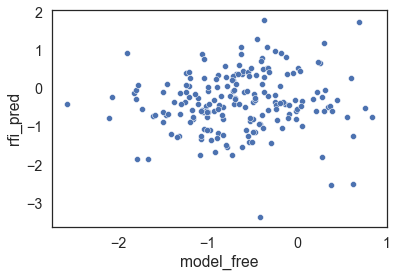

correl model free and RFI pred earned: 0.11512390472831839, p: 0.11181716252651709




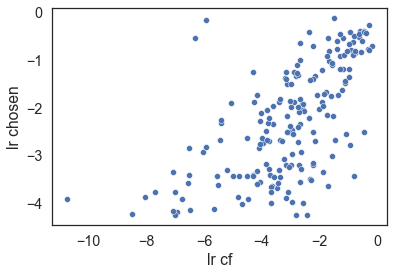

correl lrs c and cf: 0.6620985134145351, p: 1.3666887192207616e-25


Average reward earned: 3.125



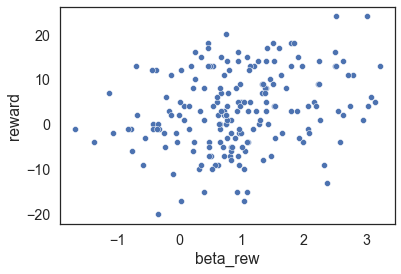

correl rew beta and reward earned: 0.26717591909413846, p: 0.00017949356982109897




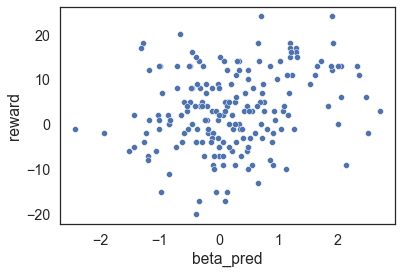

correl pred beta and reward earned: 0.22879425003345533, p: 0.0014128543495766101



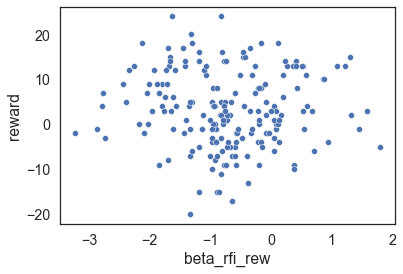

correl beta rfi reward and reward earned: -0.05222873068316397, p: 0.47185262126867833



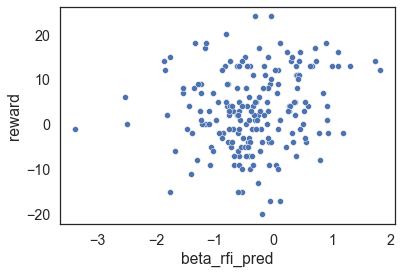

correl beta_rfi_predator and reward earned: 0.15063101903315432, p: 0.0370248986145344



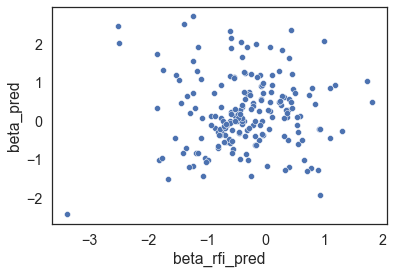

correl beta_rfi_predator and betas_pred: 0.08708257602474026, p: 0.22972979587683579



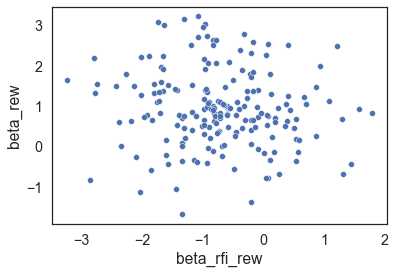

correl beta_rfi rew and betas rew: -0.12373857255242385, p: 0.08727447128936495



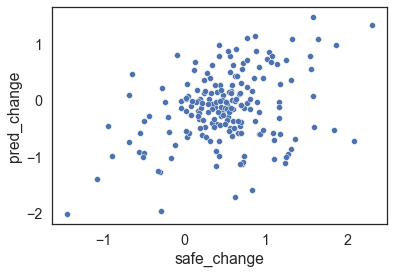

correl change safe and pred_change earned: 0.21261664812956085, p: 0.003068481412573384




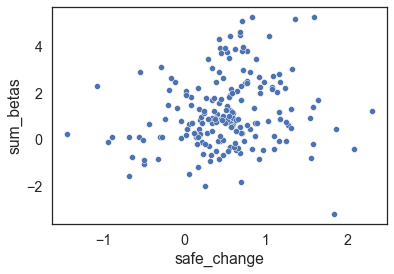

correl change safe change param and sum betas earned: 0.20485649567316824, p: 0.004367374074356837




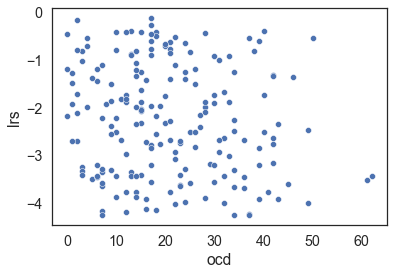

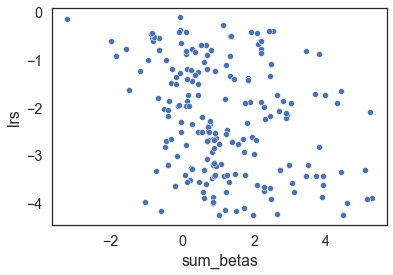

correl  betas and  lrs: -0.2981309171798281, p: 2.66966370552222e-05



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


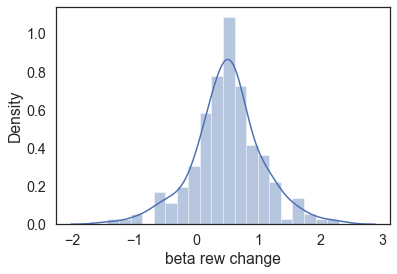

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


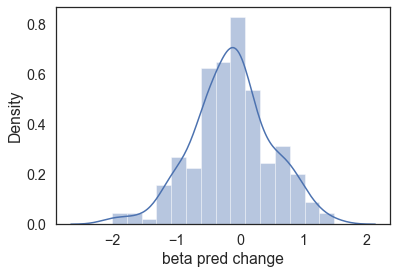

t: 12.281762019571133, p: 6.224437916821557e-26 reward feature attention change across env
t: -2.9693872780598425, p: 0.003366532328094669  predator feature attention change across env


correl lrs and ans: -0.07149903694612098, p: 0.3243725179994118
correl safe and anx: -0.08007500385753111, p: 0.269558284682349
correl safe change and anx: 0.010507475645777387, p: 0.884987925425355
correl pred and anx: 0.11784502694800177, p: 0.10354118149359648
correl sum betas and masq: 0.029799568837850263, p: 0.6815787411200105
correl pred change and anx: 0.12524147904587635, p: 0.08347202777331453
correl MF and anx: -0.013599763218302731, p: 0.8514866029270036
correl diff and masq: -0.15128107827956816, p: 0.0362070724468863


correl GP rwd and ocd: 0.11024830566087485, p: 0.1279303862841662
correl GP pun and ocd: -0.05263832459568432, p: 0.46837959111890404
correl safe and ocd: -0.05050192018649189, p: 0.4866482537002573
correl sum betas and ocd: 0.02662830060953357, p: 0.7138963765549438
correl

In [4]:
import json
from scipy.stats import spearmanr as corr
from scipy.stats import ttest_1samp as tt
from scipy.stats import ttest_ind as tt2
from scipy.stats import iqr
from scipy.stats import ttest_ind as tti
from scipy.stats import skewtest as skew
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# GET SELF REPORT DATA AND SCORE IT
worry_scores=[]
masq_scores=[]
ocd_scores=[]
rs_items_worry=[1,3,8,10,11]
rs_dict={1:5,2:5,4:2,5:1,3:3}
for entry in subs_data2.responses:
    x=json.loads(entry)

    sum_worry=0
    
    for key in x.keys():
        if int(key[1:])+1 in rs_items_worry:
            sum_worry+=rs_dict[x[key]+1]
        else:
            sum_worry+=int(x[key]+1)
    worry_scores.append(sum_worry)
for entry in subs_data1.responses:
    x=json.loads(entry)
    masq_sum=0
#     print(len(x.keys()))
    for key in x.keys():
        masq_sum+=int(x[key])
    masq_scores.append(masq_sum)

for entry in subs_data3.responses:
    x=json.loads(entry)
    ocd_sum=0
#     print(len(x.keys()))
    for key in x.keys():
        ocd_sum+=int(x[key])
    ocd_scores.append(ocd_sum)
    
# DATA LOAD
rews=subs_data1.rewards.tolist()
errs=subs_data1.errors.tolist()
safe_firsts=subs_data1.safe_first.tolist()
safe_first=[1 if x==True else -1 for x in safe_firsts]
versions=subs_data1.version.tolist()
jrews=subs_data1.just_rewards.tolist()
jpunishments=subs_data1.just_punishments.tolist()
print('mean OCD scores removed subjects: {}, sd = {}'.format(np.mean(ocd_scores_removed),np.std(ocd_scores_removed)))
print('mean OCD scores subjects: {}, sd = {}'.format(np.mean(ocd_scores),np.std(ocd_scores)))
t,p=tt2(ocd_scores,ocd_scores_removed,equal_var=False)
print('diff in OCD scores retained vs. removed samples: t={},p={}'.format(t,p))
print('')
print('mean masq scores removed subjects: {}, sd = {}'.format(np.mean(masq_scores_removed),np.std(masq_scores_removed)))
print('mean masq scores subjects: {}, sd = {}'.format(np.mean(masq_scores),np.std(masq_scores)))
t,p=tt2(masq_scores,masq_scores_removed,equal_var=False)
print('diff in anx aro scores retained vs. removed samples: t={},p={}'.format(t,p))
print('')
print('mean worry scores removed subjects: {}, sd = {}'.format(np.mean(worry_scores_removed),np.std(worry_scores_removed)))
print('mean worry scores subjects: {}, sd = {}'.format(np.mean(worry_scores),np.std(worry_scores)))

t,p=tt2(worry_scores,worry_scores_removed,equal_var=False)
print('diff in worry scores retained vs. removed samples: t={},p={}'.format(t,p))

print('length worry {}'.format(len(worry_scores)))
# plot self report distributions

temp_f=pd.Series(worry_scores,name='worry')
sns.distplot(temp_f)
plt.show()

temp_f=pd.Series(masq_scores,name='anx aro')
sns.distplot(temp_f)
plt.show()


temp_f=pd.Series(ocd_scores,name='ocd')
sns.distplot(temp_f)
plt.show()




rews=subs_data1.rewards.tolist()
errs=subs_data1.errors.tolist()

#load best-fitting parameters per subject from model-fitting
lr_value=np.load('lrvs_bestfit.npy')
beta_mf=np.load('mf_betas_bestfit.npy')
lrs=np.load('lr_features_bestfit.npy')
betas_safe=np.load('mb_rew_betas_bestfit.npy')
betas_pred=np.load('mb_pun_betas_bestfit.npy')
safe_change=np.load('change_rew_bestfit.npy')
pred_change=np.load('change_pun_bestfit.npy')
lr_cf=np.load('lrcfs_bestfit.npy')
betas_rfi_reward=np.load('gprew_betas_bestfit.npy')
betas_rfi_predator=np.load('gppun_betas_bestfit.npy')
stick=np.load('ap_betas_bestfit.npy')
sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.3, color_codes=True, rc=None)

parameters_df=pd.DataFrame()
parameters_df['lr value']=lr_value
parameters_df['MF']=beta_mf

parameters_df['LR feature']=lrs

parameters_df['MB reward']=betas_safe
parameters_df['MB punish']=betas_pred

parameters_df['CH reward']=safe_change

parameters_df['CH punish']=pred_change

parameters_df['lr cf']=lr_cf
parameters_df['GP reward']=betas_rfi_reward
parameters_df['GP punish']=betas_rfi_predator

parameters_df['AP']=stick

corr1 = parameters_df.corr()
corr1=round(corr1,2)
corr1.to_csv('correlations_between_fitted_parameters.csv')
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1,annot=True, cmap=cmap, center=0,
            square=True, linewidths=.5)
plt.title('Fitted Parameters: Real Data', fontsize = 20) # title with fontsize 20
plt.xlabel('Fitted Parameters', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Fitted Parameters', fontsize = 15) # y-axis label with fontsize 15

plt.savefig('fitted_parameters_correlations.png',bbox_inches='tight',dpi=300)

plt.show()



print('beta pred {} m, {} sd'.format(np.mean(betas_pred),np.std(betas_pred)))
print('beta safe {} m, {} sd'.format(np.mean(betas_safe),np.std(betas_safe)))
print('lr features {} m, {} sd'.format(np.mean(lrs),np.std(lrs)))
print('lr features {} med, {} sd'.format(np.median(lrs),np.std(lrs)))
print('lr cf {} m, {} sd'.format(np.mean(lr_cf),np.std(lrs)))
print('lr cf {} med, {} sd'.format(np.median(lr_cf),np.std(lrs)))

print('MEDIAN DIFF PRED AND RWD MB: {}'.format(np.median(betas_safe)-np.median(betas_pred)))
print('beta pred change mean {}, SD {} '.format(np.mean(pred_change),np.std(pred_change)))
print('beta safe change mean {}, SD {} '.format(np.mean(safe_change),np.std(safe_change)))
print('beta GI pred: med{}, SD {}'.format(np.median(betas_rfi_predator),np.std(betas_rfi_predator)))
print('beta GI rew: med{}, SD {}'.format(np.median(betas_rfi_reward),np.std(betas_rfi_reward)))
print('beta GI pred: m{}, SD {}'.format(np.mean(betas_rfi_predator),np.std(betas_rfi_predator)))
print('beta GI rew: m{}, SD {}'.format(np.mean(betas_rfi_reward),np.std(betas_rfi_reward)))


# bad_subs=[]
# for i in range(len(betas_safe)):
#     if betas_rfi_predator[i]>3.95:
#         bad_subs.append(i)


pred_change_ad=[betas_pred[i]-np.abs(pred_change[i]) for i in range(len(pred_change))]
safe_change_ad=[betas_safe[i]-np.abs(safe_change[i]) for i in range(len(pred_change))]

num_subjects=192
num_mf=0
num_rfi=0


sign=[pred_change[i]/np.abs(pred_change[i]) for i in range(len(pred_change))]


#edit
betas_safe=[betas_safe[x] for x in range(num_subjects) if x not in bad_subs]
betas_pred=[betas_pred[x] for x in range(num_subjects) if x not in bad_subs]
betas_rfi_reward=[betas_rfi_reward[x] for x in range(num_subjects) if x not in bad_subs]
betas_rfi_predator=[betas_rfi_predator[x] for x in range(num_subjects) if x not in bad_subs]
pred_change=[pred_change[x] for x in range(num_subjects) if x not in bad_subs]
safe_change=[safe_change[x] for x in range(num_subjects) if x not in bad_subs]
stick=[stick[x] for x in range(num_subjects) if x not in bad_subs]
beta_mf=[beta_mf[x] for x in range(num_subjects) if x not in bad_subs]
lrs=[lrs[x] for x in range(num_subjects) if x not in bad_subs]
lr_cf=[lr_cf[x] for x in range(num_subjects) if x not in bad_subs]
masq_scores=[masq_scores[x] for x in range(num_subjects) if x not in bad_subs]
ocd_scores=[ocd_scores[x] for x in range(num_subjects) if x not in bad_subs]        
worry_scores=[worry_scores[x] for x in range(num_subjects) if x not in bad_subs]  
jpunishments=[jpunishments[x] for x in range(num_subjects) if x not in bad_subs]        
jrews=[jrews[x] for x in range(num_subjects) if x not in bad_subs]        

errs=[errs[x] for x in range(num_subjects) if x not in bad_subs]        
rews=[rews[x] for x in range(num_subjects) if x not in bad_subs]
safe_first=[safe_first[x] for x in range(num_subjects) if x not in bad_subs]    
versions=[versions[x] for x in range(num_subjects) if x not in bad_subs]

print('stick {} med, {} sd'.format(np.median(stick),np.std(stick)))
print('stick {} m, {} sd'.format(np.mean(stick),np.std(stick)))
print('beta MF {} m, {} sd'.format(np.mean(beta_mf),np.std(beta_mf)))
print('beta MF {} med, {} sd'.format(np.median(beta_mf),np.std(beta_mf)))
print('beta pred {} med, {} sd'.format(np.median(betas_pred),np.std(betas_pred)))

data=betas_pred
# First quartile (Q1)
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
print('Q1:{}, Q3:{}, IQR:{}'.format(Q1,Q3,IQR))
print('beta safe {} med, {} sd'.format(np.median(betas_safe),np.std(betas_safe)))
data=betas_safe
# First quartile (Q1)
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
print('Q1:{}, Q3:{}, IQR:{}'.format(Q1,Q3,IQR))

print('')
print('SKEWNESS TESTS')
z,p=skew(betas_pred)
print('mb pun{},{}'.format(z,p))
z,p=skew(betas_safe)
print('mb rew {},{}'.format(z,p))
z,p=skew(betas_rfi_predator)
print('gp pun {},{}'.format(z,p))
z,p=skew(betas_rfi_reward)
print('gp rew {},{}'.format(z,p))
z,p=skew(pred_change)
print('mb ch pun {},{}'.format(z,p))
z,p=skew(safe_change)
print('mb ch rew {},{}'.format(z,p))
z,p=skew(lrs)
print('lr {},{}'.format(z,p))
z,p=skew(lr_cf)
print('lr cf {},{}'.format(z,p))
z,p=skew(beta_mf)
print('beta mf {},{}'.format(z,p))
z,p=skew(stick)
print('ap {},{}'.format(z,p))
print('')


# mb_mf=[(betas_safe[i]+betas_pred[i])-(beta_mf[i]+betas_rfi_reward[i]) for i in range(num_subjects-num_mf)]
# pred_more_rfi=[betas_pred[i]-betas_rfi_reward[i] for i in range(num_subjects-num_mf)]



# more_model_free=[(beta_mf[i]+betas_rfi_reward[i]+betas_rfi_predator[i])-(betas_pred[i]+betas_safe[i]) for i in range(len(betas_safe))]
# min_model_free=np.abs(np.min(more_model_free))
# more_model_free=[np.log(i+min_model_free+1) for i in more_model_free]
beta_rfi_more_pred=[(betas_rfi_reward[i]-betas_rfi_predator[i]) for i in range(len(betas_pred))]
more_model_free=[(betas_rfi_reward[i]+betas_rfi_predator[i])-(betas_pred[i]+betas_safe[i]) for i in range(len(betas_safe))]


diff_betas=[betas_pred[i]-betas_safe[i] for i in range(len(pred_change))]
diff_change=[safe_change[i]-pred_change[i] for i in range(len(pred_change))]

r,p=corr(diff_change,beta_rfi_more_pred)
print('corr diff RFI and MB: {},pval: {}'.format(r,p))




# CLINICAL CUTOFF T TESTS
nonclin_worry=[]
clin_worry=[]
clinical_cutoff_worry=[1 if x>61 else 0 for x in worry_scores]
counter=0
for i in clinical_cutoff_worry:
    if i==1:
        clin_worry.append(counter)
    else:
        nonclin_worry.append(counter)
    counter+=1

print('percent clinical worry = {}'.format(np.sum(clinical_cutoff_worry)/211.0))
nonclin_masq=[]
clin_masq=[]
clinical_cutoff_masq=[1 if x>18 else 0 for x in masq_scores]
counter=0
for i in clinical_cutoff_masq:
    if i==1:
        clin_masq.append(counter)
    else:
        nonclin_masq.append(counter)
    counter+=1
print('percent clinical masq = {}'.format(np.sum(clinical_cutoff_masq)/211.0))
nonclin_ocd=[]
clin_ocd=[]
clinical_cutoff_ocd=[1 if x>20 else 0 for x in ocd_scores]
counter=0
for i in clinical_cutoff_ocd:
    if i==1:
        clin_ocd.append(counter)
    else:
        nonclin_ocd.append(counter)
    counter+=1
print('percent clinical ocd= {}'.format(np.sum(clinical_cutoff_ocd)/211.0))
print('')
print('length high worry: {}'.format(len(clin_worry)))
print('length high ocd: {}'.format(len(clin_ocd)))
print('length high masq: {}'.format(len(clin_masq)))
print('')
r,p=corr(masq_scores,worry_scores)
print('correl masq and worry: {}'.format(r))
r,p=corr(masq_scores,ocd_scores)
print('correl masq and ocd: {}'.format(r))

betas_pred_worry_low=[]
betas_pred_worry_high=[]
betas_pred_ocd_low=[]
betas_pred_ocd_high=[]
betas_pred_masq_low=[]
betas_pred_masq_high=[]
safe_first_beta_pred=[]
danger_first_beta_pred=[]
for i in range(len(betas_pred)):
    if safe_firsts[i]==1:
        safe_first_beta_pred.append(betas_pred[i])
    if safe_firsts[i]==0:
        danger_first_beta_pred.append(betas_pred[i])
    if i in clin_worry:
        betas_pred_worry_high.append(betas_pred[i])
    if i in clin_masq:
        betas_pred_masq_high.append(betas_pred[i])
    if i in clin_ocd:
        betas_pred_ocd_high.append(betas_pred[i])
    if i in nonclin_worry:
        betas_pred_worry_low.append(betas_pred[i])
    if i in nonclin_masq:
        betas_pred_masq_low.append(betas_pred[i])
    if i in nonclin_ocd:
        betas_pred_ocd_low.append(betas_pred[i])
print('')
t,p=tt2(safe_first_beta_pred,danger_first_beta_pred)
print('t : {}, p: {} diff ORDER SAFE for BETA PRED'.format(t,p))
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(betas_pred_worry_low),np.mean(betas_pred_worry_high)))
t,p=tt2(betas_pred_worry_low,betas_pred_worry_high)
print('t : {}, p: {} diff worry pred'.format(t,p))
print('mean low ocd: {}, mean high ocd: {}'.format(np.mean(betas_pred_ocd_low),np.mean(betas_pred_ocd_high)))
t,p=tt2(betas_pred_ocd_low,betas_pred_ocd_high)
print('t : {}, p: {} diff ocd pred'.format(t,p))
print('')
print('{} {} m sd for pred'.format(np.mean(betas_pred),np.std(betas_pred)))
#betas_pred=np.log(betas_pred)
pred_change_worry_low=[]
pred_change_worry_high=[]
pred_change_ocd_low=[]
pred_change_ocd_high=[]
pred_change_masq_low=[]
pred_change_masq_high=[]
for i in range(len(pred_change)):
    if i in clin_worry:
        pred_change_worry_high.append(pred_change[i])
    if i in clin_masq:
        pred_change_masq_high.append(pred_change[i])
    if i in clin_ocd:
        pred_change_ocd_high.append(pred_change[i])
    if i in nonclin_worry:
        pred_change_worry_low.append(pred_change[i])
    if i in nonclin_masq:
        pred_change_masq_low.append(pred_change[i])
    if i in nonclin_ocd:
        pred_change_ocd_low.append(pred_change[i])
print('')

print('mean low worry: {}, mean high worry: {}'.format(np.mean(pred_change_worry_low),np.mean(pred_change_worry_high)))
t,p=tt2(pred_change_worry_low,pred_change_worry_high)
print('t : {}, p: {} diff worry change pred'.format(t,p))
print('')
print('mean low ocd: {}, mean high ocd: {}'.format(np.mean(pred_change_ocd_low),np.mean(pred_change_ocd_high)))
t,p=tt2(pred_change_ocd_low,pred_change_ocd_high)
print('t : {}, p: {} diff ocd change pred'.format(t,p))
print('')

lrs_worry_low=[]
lrs_worry_high=[]
lrs_ocd_low=[]
lrs_ocd_high=[]
lrs_masq_low=[]
lrs_masq_high=[]
ocd_zscore=[(i-np.mean(ocd_scores))/np.std(ocd_scores) for i in ocd_scores]
lrs_low_ocdzscore=[]
lrs_high_ocdzscore=[]
for i in range(len(lrs)):
    if i in clin_worry:
        lrs_worry_high.append(lrs[i])
    if i in clin_masq:
        lrs_masq_high.append(lrs[i])
    if i in clin_ocd:
        lrs_ocd_high.append(lrs[i])
    if i in nonclin_worry:
        lrs_worry_low.append(lrs[i])
    if i in nonclin_masq:
        lrs_masq_low.append(lrs[i])
    if i in nonclin_ocd:
        lrs_ocd_low.append(lrs[i])
    if ocd_zscore[i]<=-1:
        lrs_low_ocdzscore.append(lrs[i])
    elif ocd_zscore[i]>=1:
        lrs_high_ocdzscore.append(lrs[i])
print('')

print('mean low worry: {}, mean high worry: {}'.format(np.mean(lrs_worry_low),np.mean(lrs_worry_high)))

t,p=tt2(lrs_worry_low,lrs_worry_high)
print('low worry LRS plot')
sns.distplot(lrs_worry_low)
plt.show()
print('high worry LRS plot')
sns.distplot(lrs_worry_high)
plt.show()



print('t : {}, p: {} diff worry lrs'.format(t,p))
print('')
print('mean low ocd: {}, mean high ocd: {}'.format(np.mean(lrs_ocd_low),np.mean(lrs_ocd_high)))
print('median low ocd: {}, median high ocd: {}'.format(np.median(lrs_ocd_low),np.median(lrs_ocd_high)))
print('mean low ocd ZSCORE (<=-1): {}, mean high ocd: {}'.format(np.mean(lrs_low_ocdzscore),np.mean(lrs_high_ocdzscore)))
print('median low ocd ZSCORE (>=1): {}, median high ocd: {}'.format(np.median(lrs_low_ocdzscore),np.median(lrs_high_ocdzscore)))
print('')
t,p=tt2(lrs_ocd_low,lrs_ocd_high)
print('t : {}, p: {} diff ocd lrs'.format(t,p))
print('')


betas_safe_worry_low=[]
betas_safe_worry_high=[]
betas_safe_ocd_low=[]
betas_safe_ocd_high=[]
betas_safe_masq_low=[]
betas_safe_masq_high=[]
safe_first_beta_safe=[]
danger_first_beta_safe=[]
for i in range(len(betas_safe)):
    if safe_firsts[i]==1:
        safe_first_beta_safe.append(betas_safe[i])
    if safe_firsts[i]==0:
        danger_first_beta_safe.append(betas_safe[i])
    if i in clin_worry:
        betas_safe_worry_high.append(betas_safe[i])
    if i in clin_masq:
        betas_safe_masq_high.append(betas_safe[i])
    if i in clin_ocd:
        betas_safe_ocd_high.append(betas_safe[i])
    if i in nonclin_worry:
        betas_safe_worry_low.append(betas_safe[i])
    if i in nonclin_masq:
        betas_safe_masq_low.append(betas_safe[i])
    if i in nonclin_ocd:
        betas_safe_ocd_low.append(betas_safe[i])
print('')
print('')
t,p=tt2(safe_first_beta_safe,danger_first_beta_safe)
print('t : {}, p: {} diff ORDER SAFE for SAFE PRED'.format(t,p))
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(betas_safe_worry_low),np.mean(betas_safe_worry_high)))

t,p=tt2(betas_safe_worry_low,betas_safe_worry_high)
print('t : {}, p: {} diff worry rew'.format(t,p))
print('')
print('mean low ocd: {}, mean high ocd: {}'.format(np.mean(betas_safe_ocd_low),np.mean(betas_safe_ocd_high)))
t,p=tt2(betas_safe_ocd_low,betas_safe_ocd_high)
print('t : {}, p: {} diff ocd rew'.format(t,p))
print('')
print('{} {} m sd for rew'.format(np.mean(betas_safe),np.std(betas_safe)))


#betas_safe=np.log(betas_safe)
safe_change_worry_low=[]
safe_change_worry_high=[]
safe_change_ocd_low=[]
safe_change_ocd_high=[]
safe_change_masq_low=[]
safe_change_masq_high=[]
for i in range(len(safe_change)):
    if i in clin_worry:
        safe_change_worry_high.append(safe_change[i])
    if i in clin_masq:
        safe_change_masq_high.append(safe_change[i])
    if i in clin_ocd:
        safe_change_ocd_high.append(safe_change[i])
    if i in nonclin_worry:
        safe_change_worry_low.append(safe_change[i])
    if i in nonclin_masq:
        safe_change_masq_low.append(safe_change[i])
    if i in nonclin_ocd:
        safe_change_ocd_low.append(safe_change[i])
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(safe_change_worry_low),np.mean(safe_change_worry_high)))
t,p=tt2(safe_change_worry_low,safe_change_worry_high)
print('t : {}, p: {} diff worry change safe'.format(t,p))

t,p=tt2(safe_change_ocd_low,safe_change_ocd_high)
print('t : {}, p: {} diff ocd change safe'.format(t,p))
print('')
beta_mf_worry_low=[]
beta_mf_worry_high=[]
punishments_worry_low=[]
punishments_worry_high=[]
rewards_worry_low=[]
rewards_worry_high=[]
beta_mf_ocd_low=[]
beta_mf_ocd_high=[]
beta_mf_masq_low=[]
beta_mf_masq_high=[]
for i in range(len(beta_mf)):
    if i in clin_worry:
        beta_mf_worry_high.append(beta_mf[i])
        punishments_worry_high.append(jpunishments[i])
        rewards_worry_high.append(jrews[i])
    if i in clin_masq:
        beta_mf_masq_high.append(beta_mf[i])
    if i in clin_ocd:
        beta_mf_ocd_high.append(beta_mf[i])
    if i in nonclin_worry:
        punishments_worry_low.append(jpunishments[i])
        rewards_worry_low.append(jrews[i])
        beta_mf_worry_low.append(beta_mf[i])
    if i in nonclin_masq:
        beta_mf_masq_low.append(beta_mf[i])
    if i in nonclin_ocd:
        beta_mf_ocd_low.append(beta_mf[i])
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(beta_mf_worry_low),np.mean(beta_mf_worry_high)))

t,p=tt2(beta_mf_worry_low,beta_mf_worry_high)
print('t : {}, p: {} diff worry change beta_mf'.format(t,p))



print('mean low worry: {}, mean high worry: {} PUNISHMENTS'.format(np.mean(punishments_worry_low),np.mean(punishments_worry_high)))

t,p=tt2(punishments_worry_low,punishments_worry_high)
print('t : {}, p: {} diff worry punishments'.format(t,p))
print('')
temp_f=pd.DataFrame()
temp_f['punishments']=jpunishments
temp_f['worry']=worry_scores
sns.scatterplot(data=temp_f, x="worry", y="punishments")
# plt.savefig('worry_punishments_correlation.png',dpi=300)
plt.show()
r,p=corr(jpunishments,worry_scores)
print('correl worry and punishments: {}, p: {}'.format(r,p))
print('')
r,p=corr(jrews,worry_scores)
print('correl worry and rewards: {}, p: {}'.format(r,p))
print('')

print('mean low worry: {}, mean high worry: {} REWARDS'.format(np.mean(rewards_worry_low),np.mean(rewards_worry_high)))

t,p=tt2(rewards_worry_low,rewards_worry_high)
print('t : {}, p: {} diff worry rewards'.format(t,p))


t,p=tt2(beta_mf_ocd_low,beta_mf_ocd_high)
print('t : {}, p: {} diff ocd change beta_mf'.format(t,p))
print('')
print('{} {} m sd for MF'.format(np.mean(beta_mf),np.std(beta_mf)))


t,p=tt2(safe_change_ocd_low,safe_change_ocd_high)
print('t : {}, p: {} diff ocd change safe'.format(t,p))
print('')
betas_rfi_predator_worry_low=[]
betas_rfi_predator_worry_high=[]
betas_rfi_predator_ocd_low=[]
betas_rfi_predator_ocd_high=[]
betas_rfi_predator_masq_low=[]
betas_rfi_predator_masq_high=[]
for i in range(len(betas_rfi_predator)):
    if i in clin_worry:
        betas_rfi_predator_worry_high.append(betas_rfi_predator[i])
    if i in clin_masq:
        betas_rfi_predator_masq_high.append(betas_rfi_predator[i])
    if i in clin_ocd:
        betas_rfi_predator_ocd_high.append(betas_rfi_predator[i])
    if i in nonclin_worry:
        betas_rfi_predator_worry_low.append(betas_rfi_predator[i])
    if i in nonclin_masq:
        betas_rfi_predator_masq_low.append(betas_rfi_predator[i])
    if i in nonclin_ocd:
        betas_rfi_predator_ocd_low.append(betas_rfi_predator[i])
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(betas_rfi_predator_worry_low),np.mean(betas_rfi_predator_worry_high)))
print('median low worry: {}, median high worry: {}'.format(np.median(betas_rfi_predator_worry_low),np.median(betas_rfi_predator_worry_high)))

t,p=tt2(betas_rfi_predator_worry_low,betas_rfi_predator_worry_high)
print('t : {}, p: {} diff worry betas_rfi_predator'.format(t,p))

t,p=tt2(betas_rfi_predator_ocd_low,betas_rfi_predator_ocd_high)
print('t : {}, p: {} diff ocd  betas_rfi_predator'.format(t,p))
print('')

betas_rfi_reward_worry_low=[]
betas_rfi_reward_worry_high=[]
betas_rfi_reward_ocd_low=[]
betas_rfi_reward_ocd_high=[]
betas_rfi_reward_masq_low=[]
betas_rfi_reward_masq_high=[]
for i in range(len(betas_rfi_reward)):
    if i in clin_worry:
        betas_rfi_reward_worry_high.append(betas_rfi_reward[i])
    if i in clin_masq:
        betas_rfi_reward_masq_high.append(betas_rfi_reward[i])
    if i in clin_ocd:
        betas_rfi_reward_ocd_high.append(betas_rfi_reward[i])
    if i in nonclin_worry:
        betas_rfi_reward_worry_low.append(betas_rfi_reward[i])
    if i in nonclin_masq:
        betas_rfi_reward_masq_low.append(betas_rfi_reward[i])
    if i in nonclin_ocd:
        betas_rfi_reward_ocd_low.append(betas_rfi_reward[i])
print('')
print('mean low worry: {}, mean high worry: {}'.format(np.mean(betas_rfi_reward_worry_low),np.mean(betas_rfi_reward_worry_high)))

t,p=tt2(betas_rfi_reward_worry_low,betas_rfi_reward_worry_high)
print('t : {}, p: {} diff worry betas_rfi_reward'.format(t,p))

t,p=tt2(betas_rfi_reward_ocd_low,betas_rfi_reward_ocd_high)
print('t : {}, p: {} diff ocd  betas_rfi_reward'.format(t,p))
print('')
print('{} {} m sd for MF'.format(np.mean(betas_rfi_predator),np.std(betas_rfi_predator)))

from scipy.stats import ttest_rel as tt_rel

t,p=tt_rel(betas_safe,betas_pred)
print('t : {}, p: {} diff safe - pred betas'.format(t,p))
print('')

betas_rfi_predatorr=[betas_rfi_predator[i]*-1 for i in range(len(betas_pred))]
t,p=tt_rel(betas_rfi_reward,betas_rfi_predator)
print('t : {}, p: {} diff betas safe - pred RFI'.format(t,p))
print('')

sum_betas=[betas_pred[i]+betas_safe[i] for i in range(len(ocd_scores))]

sum_betas_rfi_reward_worry_low=[]
sum_betas_rfi_reward_worry_high=[]
sum_betas_rfi_reward_ocd_low=[]
sum_betas_rfi_reward_ocd_high=[]
sum_betas_rfi_reward_masq_low=[]
sum_betas_rfi_reward_masq_high=[]
for i in range(len(betas_rfi_reward)):
    if i in clin_worry:
        sum_betas_rfi_reward_worry_high.append(sum_betas[i])
    if i in clin_masq:
        sum_betas_rfi_reward_masq_high.append(sum_betas[i])
    if i in clin_ocd:
        sum_betas_rfi_reward_ocd_high.append(sum_betas[i])
    if i in nonclin_worry:
        sum_betas_rfi_reward_worry_low.append(sum_betas[i])
    if i in nonclin_masq:
        sum_betas_rfi_reward_masq_low.append(sum_betas[i])
    if i in nonclin_ocd:
        sum_betas_rfi_reward_ocd_low.append(sum_betas[i])
print('')
print('mean low worry: {}, mean high worry: {} sum betas'.format(np.mean(sum_betas_rfi_reward_worry_low),np.mean(sum_betas_rfi_reward_worry_high)))

t,p=tt2(sum_betas_rfi_reward_worry_low,sum_betas_rfi_reward_worry_high)
print('t : {}, p: {} diff worry sum betas'.format(t,p))

t,p=tt2(sum_betas_rfi_reward_ocd_low,sum_betas_rfi_reward_ocd_high)
print('t : {}, p: {} diff ocd  sum betas'.format(t,p))
print('')

# print('{} {} m sd for MF'.format(np.mean(betas_rfi_predator),np.std(betas_rfi_predator)))


safe_first_safe_change=[]
safe_second_safe_change=[]
safe_first_rc=[]
pred_first_rc=[]

for i in range(len(safe_first)):
    if safe_first[i]==1.0:
        safe_first_safe_change.append(safe_change[i])
    else:
        safe_second_safe_change.append(safe_change[i])

    
t,p=tt2(safe_first_safe_change,safe_second_safe_change, equal_var=False)
print('t : {}, p: {} diff rew change param different orders'.format(t,p))
print('')

print('')
print('TOTAL SUBJECTS IN STUDY: {}'.format(len(ocd_scores)))
print('length safe change param: {}'.format(len(safe_change)))
pred_more_rfi=[betas_rfi_predator[i]-betas_pred[i] for i in range(len(betas_safe))]
rew_more_rfi=[betas_rfi_reward[i]-betas_safe[i] for i in range(len(betas_safe))]
more_model_free=[(betas_rfi_reward[i]+betas_rfi_predator[i])-(betas_pred[i]+betas_safe[i]) for i in range(len(betas_safe))]
min_model_free=np.abs(np.min(more_model_free))
more_model_free=[(i+min_model_free+1)/np.max(more_model_free) for i in more_model_free]


v0_gppun=[betas_rfi_predator[i] for i in range(len(betas_rfi_predator)) if versions[i]==0]
v1_gppun=[betas_rfi_predator[i] for i in range(len(betas_rfi_predator)) if versions[i]==1]
v0_gprew=[betas_rfi_reward[i] for i in range(len(betas_rfi_predator)) if versions[i]==0]
v1_gprew=[betas_rfi_reward[i] for i in range(len(betas_rfi_predator)) if versions[i]==1]
print('')
print('')
t,p=tt2(v0_gppun,v1_gppun, equal_var=False)
print('t : {}, p: {} diff gp pun versions'.format(t,p))
print('')
print('')

print('')
print('')
t,p=tt2(v0_gprew,v1_gprew, equal_var=False)
print('t : {}, p: {} diff gp rwd versions'.format(t,p))
print('')
print('')

v0_mbpun=[betas_pred[i] for i in range(len(betas_pred)) if versions[i]==0]
v1_mbpun=[betas_pred[i] for i in range(len(betas_pred)) if versions[i]==1]
v0_mbrew=[betas_safe[i] for i in range(len(betas_pred)) if versions[i]==0]
v1_mbrew=[betas_safe[i] for i in range(len(betas_pred)) if versions[i]==1]
print('')
print('')
print('mean v0 pred: {}'.format(np.mean(v0_mbpun)))
print('mean v1 pred: {}'.format(np.mean(v1_mbpun)))

t,p=tt2(v0_mbpun,v1_mbpun, equal_var=False)
print('t : {}, p: {} diff mb pun versions'.format(t,p))

print('')
print('')

print('')
print('')
t,p=tt2(v0_mbrew,v1_mbrew, equal_var=False)
print('t : {}, p: {} diff mb rwd versions'.format(t,p))
print('')
print('')



#log transform skewed variables
betas_rfi_predator=np.log(betas_rfi_predator)
betas_rfi_reward=np.log(betas_rfi_reward)
beta_mf=np.log(beta_mf)
betas_pred=np.log(betas_pred)
betas_safe=np.log(betas_safe)
lrs=np.log(lrs)
lr_cf=np.log(lr_cf)

more_model_free=[(betas_rfi_reward[i]+betas_rfi_predator[i])-(betas_pred[i]+betas_safe[i]) for i in range(len(betas_safe))]
beta_rfi_more_pred=[(betas_rfi_predator[i]-betas_pred[i]) for i in range(len(betas_pred))]
beta_rfi_more_pred_than_rfi_reward=[(betas_rfi_predator[i]-betas_rfi_reward[i]) for i in range(len(betas_pred))]

r,p=corr(betas_rfi_predator,betas_pred)
print('correl beta_rfi_predator and beta pred: {}, p: {}'.format(r,p))
print('')


# r,p=corr(betas_rfi_predator,jrews)
# print('correl beta_rfi_predator and reward recevied: {}, p: {}'.format(r,p))
# print('')

t,p= tti(betas_rfi_predator,betas_rfi_reward)
print('t val:{}, p:{}'.format(t,p))



temp_f=pd.Series(rews,name='rewards')
sns.distplot(temp_f)
plt.show()

temp_f=pd.DataFrame()
temp_f['ocd']=ocd_scores
temp_f['betas_safe']=betas_safe
sns.scatterplot(data=temp_f, x="ocd", y="betas_safe")
plt.show()

diff_betas=[betas_safe[i]-betas_pred[i] for i in range(len(ocd_scores))]
sum_betas=[betas_pred[i]+betas_safe[i] for i in range(len(ocd_scores))]

print('')
temp_f=pd.DataFrame()
temp_f['sum_betas']=sum_betas
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="sum_betas", y="reward")
# plt.savefig('sumbetas_earnedreward_correlation.png',dpi=300)
plt.show()
r,p=corr(sum_betas,rews)
print('correl sum betas and reward earned: {}, p: {}'.format(r,p))
print('')

print('')
temp_f=pd.DataFrame()
temp_f['model_free']=beta_mf
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="model_free", y="reward")
# plt.savefig('modelFree_earnedreward_correlation.png',dpi=300)
plt.show()
r,p=corr(beta_mf,rews)
print('correl model free and reward earned: {}, p: {}'.format(r,p))
print('')

print('')
temp_f=pd.DataFrame()
temp_f['model_free']=beta_mf
temp_f['rfi_rew']=betas_rfi_reward
sns.scatterplot(data=temp_f, x="model_free", y="rfi_rew")
# plt.savefig('modelFree_rfiREward_correlation.png',dpi=300)
plt.show()
r,p=corr(beta_mf,betas_rfi_reward)
print('correl model free and RFI rew earned: {}, p: {}'.format(r,p))
print('')


print('')
temp_f=pd.DataFrame()
temp_f['model_free']=beta_mf
temp_f['rfi_pred']=betas_rfi_predator
sns.scatterplot(data=temp_f, x="model_free", y="rfi_pred")
# plt.savefig('modelFree_rfiPRED_correlation.png',dpi=300)
plt.show()
r,p=corr(beta_mf,betas_rfi_predator)
print('correl model free and RFI pred earned: {}, p: {}'.format(r,p))
print('')


print('')
temp_f=pd.DataFrame()
temp_f['lr chosen']=lrs
temp_f['lr cf']=lr_cf
sns.scatterplot(data=temp_f, x="lr cf", y="lr chosen")
# plt.savefig('lrf_lrfc_correlation.png',dpi=300)
plt.show()
r,p=corr(lrs,lr_cf)
print('correl lrs c and cf: {}, p: {}'.format(r,p))
print('')



print('')
print('Average reward earned: {}'.format(np.mean(rews)))
print('')
temp_f=pd.DataFrame()
temp_f['beta_rew']=betas_safe
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="beta_rew", y="reward")
# plt.savefig('betaRew_earnedreward_correlation.png',dpi=300)
plt.show()
r,p=corr(betas_safe,rews)
print('correl rew beta and reward earned: {}, p: {}'.format(r,p))
print('')

print('')
temp_f=pd.DataFrame()
temp_f['beta_pred']=betas_pred
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="beta_pred", y="reward")
# plt.savefig('betaPred_earnedreward_correlation.png',dpi=300)
plt.show()
r,p=corr(betas_pred,rews)
print('correl pred beta and reward earned: {}, p: {}'.format(r,p))
print('')

temp_f=pd.DataFrame()
temp_f['beta_rfi_rew']=betas_rfi_reward
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="beta_rfi_rew", y="reward")
# plt.savefig('betaRFIRew_earnedreward_correlation.png',dpi=300)
plt.show()
r,p=corr(betas_rfi_reward,rews)
print('correl beta rfi reward and reward earned: {}, p: {}'.format(r,p))
print('')

temp_f=pd.DataFrame()
temp_f['beta_rfi_pred']=betas_rfi_predator
temp_f['reward']=rews
sns.scatterplot(data=temp_f, x="beta_rfi_pred", y="reward")
# plt.savefig('betaRFIPred_earnedreward_correlation.png',dpi=300)
plt.show()

r,p=corr(betas_rfi_predator,rews)
print('correl beta_rfi_predator and reward earned: {}, p: {}'.format(r,p))
print('')

temp_f=pd.DataFrame()
temp_f['beta_rfi_pred']=betas_rfi_predator
temp_f['beta_pred']=betas_pred
sns.scatterplot(data=temp_f, x="beta_rfi_pred", y="beta_pred")
# plt.savefig('betaRFIPred_beta_pred_correlation.png',dpi=300)
plt.show()
r,p=corr(betas_rfi_predator,betas_pred)
print('correl beta_rfi_predator and betas_pred: {}, p: {}'.format(r,p))
print('')

temp_f=pd.DataFrame()
temp_f['beta_rfi_rew']=betas_rfi_reward
temp_f['beta_rew']=betas_safe
sns.scatterplot(data=temp_f, x="beta_rfi_rew", y="beta_rew")
# plt.savefig('betaRFIRew_beta_rew_correlation.png',dpi=300)
plt.show()
r,p=corr(betas_rfi_reward,betas_safe)
print('correl beta_rfi rew and betas rew: {}, p: {}'.format(r,p))
print('')

temp_f=pd.DataFrame()
temp_f['safe_change']=safe_change
temp_f['pred_change']=pred_change
sns.scatterplot(data=temp_f, x="safe_change", y="pred_change")
# plt.savefig('safe_change_pred_change_correlation.png',dpi=300)

plt.show()
r,p=corr(safe_change,pred_change)
print('correl change safe and pred_change earned: {}, p: {}'.format(r,p))
print('')
print('')

temp_f=pd.DataFrame()
temp_f['safe_change']=safe_change
temp_f['sum_betas']=sum_betas
sns.scatterplot(data=temp_f, x="safe_change", y="sum_betas")
# plt.savefig('safe_change_sum_betas_correlation.png',dpi=300)

plt.show()
r,p=corr(safe_change,sum_betas)
print('correl change safe change param and sum betas earned: {}, p: {}'.format(r,p))
print('')
print('')

temp_f=pd.DataFrame()
temp_f['ocd']=ocd_scores
temp_f['lrs']=lrs
sns.scatterplot(data=temp_f, x="ocd", y="lrs")
# plt.savefig('ocd_lr_correlation.png',dpi=300)
plt.show()
temp_f=pd.DataFrame()
temp_f['sum_betas']=sum_betas
temp_f['lrs']=lrs
sns.scatterplot(data=temp_f, x="sum_betas", y="lrs")
plt.show()
r,p=corr(sum_betas,lrs)

print('correl  betas and  lrs: {}, p: {}'.format(r,p))
print('')

temp_f=pd.Series(safe_change,name='beta rew change')
sns.distplot(temp_f)
plt.show()
temp_f=pd.Series(pred_change,name='beta pred change')
sns.distplot(temp_f)
plt.show()

#TEST IF CHANGE ACROSS ENVIRONMENT IS DIFF THAN 0
t,p=tt(safe_change,0)
print('t: {}, p: {} reward feature attention change across env'.format(t,p))
t,p=tt(pred_change,0)
print('t: {}, p: {}  predator feature attention change across env'.format(t,p))
print('')
print('')



r,p=corr(lrs,masq_scores)
print('correl lrs and ans: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,masq_scores)
print('correl safe and anx: {}, p: {}'.format(r,p))
r,p=corr(safe_change,masq_scores)
print('correl safe change and anx: {}, p: {}'.format(r,p))
# bad_subs=[]
# for i in range(len(betas_safe)):
#     if betas_pred[i]>20:
#         bad_subs.append(i)
# betas_pred1=[betas_pred[x] for x in range(num_subjects) if x not in bad_subs]
# masq1=[masq_scores[x] for x in range(num_subjects) if x not in bad_subs]

r,p=corr(betas_pred,masq_scores)
print('correl pred and anx: {}, p: {}'.format(r,p))

# temp_f=pd.DataFrame()
# temp_f['masq']=masq1
# temp_f['pred_beta']=betas_pred1
# sns.scatterplot(data=temp_f, x="masq", y="pred_beta")
# plt.show()

r,p=corr(masq_scores,sum_betas)
print('correl sum betas and masq: {}, p: {}'.format(r,p))
r,p=corr(pred_change,masq_scores)
print('correl pred change and anx: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,masq_scores)
print('correl MF and anx: {}, p: {}'.format(r,p))
r,p=corr(diff_betas,masq_scores)
print('correl diff and masq: {}, p: {}'.format(r,p))
print('')
print('')
r,p=corr(betas_rfi_reward,ocd_scores)
print('correl GP rwd and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_rfi_predator,ocd_scores)
print('correl GP pun and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,ocd_scores)
print('correl safe and ocd: {}, p: {}'.format(r,p))
r,p=corr(ocd_scores,sum_betas)
print('correl sum betas and ocd: {}, p: {}'.format(r,p))
r,p=corr(safe_change,ocd_scores)
print('correl safe change and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_pred,ocd_scores)
print('correl pred and ocd: {}, p: {}'.format(r,p))
r,p=corr(lrs,ocd_scores)
print('correl lrs and ocd: {}, p: {}'.format(r,p))
r,p=corr(lr_cf,ocd_scores)
print('correl lr cf and ocd: {}, p: {}'.format(r,p))
r,p=corr(pred_change,ocd_scores)
print('correl pred change and ocd: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,ocd_scores)
print('correl MF and ocd: {}, p: {}'.format(r,p))
r,p=corr(rews,ocd_scores)
print('correl rews and ocd: {}, p: {}'.format(r,p))
print('')

r,p=corr(stick,ocd_scores)
print('correl perseveration and ocd: {}, p: {}'.format(r,p))
print('')
print('')
print('')
r,p=corr(betas_rfi_reward,worry_scores)
print('correl GP rwd and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_rfi_predator,worry_scores)
print('correl GP pun and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,worry_scores)
print('correl safe and worry: {}, p: {}'.format(r,p))
r,p=corr(worry_scores,sum_betas)
print('correl sum betas and worry: {}, p: {}'.format(r,p))
r,p=corr(safe_change,worry_scores)
print('correl safe change and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_pred,worry_scores)
print('correl pred and worry: {}, p: {}'.format(r,p))
r,p=corr(lrs,worry_scores)
print('correl lrs and worry: {}, p: {}'.format(r,p))
r,p=corr(lr_cf,worry_scores)
print('correl lr cf and worry: {}, p: {}'.format(r,p))
r,p=corr(pred_change,worry_scores)
print('correl pred change and worry: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,worry_scores)
print('correl MF and worry: {}, p: {}'.format(r,p))
r,p=corr(rews,worry_scores)
print('correl rews and worry: {}, p: {}'.format(r,p))
print('')

In [69]:
r,p=corr(betas_rfi_reward,ocd_scores)
print('correl GP rwd and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_rfi_predator,ocd_scores)
print('correl GP pun and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,ocd_scores)
print('correl safe and ocd: {}, p: {}'.format(r,p))
r,p=corr(ocd_scores,sum_betas)
print('correl sum betas and ocd: {}, p: {}'.format(r,p))
r,p=corr(safe_change,ocd_scores)
print('correl safe change and ocd: {}, p: {}'.format(r,p))
r,p=corr(betas_pred,ocd_scores)
print('correl pred and ocd: {}, p: {}'.format(r,p))
r,p=corr(lrs,ocd_scores)
print('correl lrs and ocd: {}, p: {}'.format(r,p))
r,p=corr(lr_cf,ocd_scores)
print('correl lr cf and ocd: {}, p: {}'.format(r,p))
r,p=corr(pred_change,ocd_scores)
print('correl pred change and ocd: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,ocd_scores)
print('correl MF and ocd: {}, p: {}'.format(r,p))
r,p=corr(rews,ocd_scores)
print('correl rews and ocd: {}, p: {}'.format(r,p))
print('')
r,p=corr(stick,ocd_scores)
print('correl perseveration and ocd: {}, p: {}'.format(r,p))
print('')
print('')
print('')
r,p=corr(betas_rfi_reward,worry_scores)
print('correl GP rwd and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_rfi_predator,worry_scores)
print('correl GP pun and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,worry_scores)
print('correl safe and worry: {}, p: {}'.format(r,p))
r,p=corr(worry_scores,sum_betas)
print('correl sum betas and worry: {}, p: {}'.format(r,p))
r,p=corr(safe_change,worry_scores)
print('correl safe change and worry: {}, p: {}'.format(r,p))
r,p=corr(betas_pred,worry_scores)
print('correl pred and worry: {}, p: {}'.format(r,p))
r,p=corr(lrs,worry_scores)
print('correl lrs and worry: {}, p: {}'.format(r,p))
r,p=corr(lr_cf,worry_scores)
print('correl lr cf and worry: {}, p: {}'.format(r,p))
r,p=corr(pred_change,worry_scores)
print('correl pred change and worry: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,worry_scores)
print('correl MF and worry: {}, p: {}'.format(r,p))
r,p=corr(rews,worry_scores)
print('correl rews and worry: {}, p: {}'.format(r,p))
r,p=corr(stick,worry_scores)
print('correl perseveration and worry: {}, p: {}'.format(r,p))
print('')

print('')
print('')
print('')
r,p=corr(betas_rfi_reward,masq_scores)
print('correl GP rwd and masq: {}, p: {}'.format(r,p))
r,p=corr(betas_rfi_predator,masq_scores)
print('correl GP pun and masq: {}, p: {}'.format(r,p))
r,p=corr(betas_safe,masq_scores)
print('correl safe and masq: {}, p: {}'.format(r,p))
r,p=corr(masq_scores,sum_betas)
print('correl sum betas and masq: {}, p: {}'.format(r,p))
r,p=corr(safe_change,masq_scores)
print('correl safe change and masq: {}, p: {}'.format(r,p))
r,p=corr(betas_pred,masq_scores)
print('correl pred and masq: {}, p: {}'.format(r,p))
r,p=corr(lrs,masq_scores)
print('correl lrs and masq: {}, p: {}'.format(r,p))
r,p=corr(lr_cf,masq_scores)
print('correl lr cf and masq: {}, p: {}'.format(r,p))
r,p=corr(pred_change,masq_scores)
print('correl pred change and masq: {}, p: {}'.format(r,p))
r,p=corr(beta_mf,masq_scores)
print('correl MF and masq: {}, p: {}'.format(r,p))
r,p=corr(rews,masq_scores)
print('correl rews and masq: {}, p: {}'.format(r,p))
r,p=corr(stick,masq_scores)
print('correl perseveration and masq: {}, p: {}'.format(r,p))
print('')

correl GP rwd and ocd: 0.11024830566087485, p: 0.1279303862841662
correl GP pun and ocd: -0.05263832459568432, p: 0.46837959111890404
correl safe and ocd: -0.05050192018649189, p: 0.4866482537002573
correl sum betas and ocd: 0.02662830060953357, p: 0.7138963765549438
correl safe change and ocd: 0.07628634529497486, p: 0.29294391231341493
correl pred and ocd: 0.040626456533996144, p: 0.5758261385403405
correl lrs and ocd: -0.1322094234741456, p: 0.06754690624640182
correl lr cf and ocd: -0.06691381447878364, p: 0.35644276720731227
correl pred change and ocd: 0.058897421276843595, p: 0.4170888231435862
correl MF and ocd: 0.023995748292688256, p: 0.741119477882316
correl rews and ocd: 0.08782817400284702, p: 0.22575043615993512

correl perseveration and ocd: -0.029321917284243847, p: 0.6864111882185022



correl GP rwd and worry: 0.11037197242754908, p: 0.12750065643944808
correl GP pun and worry: 0.08773130691471837, p: 0.2262646520965213
correl safe and worry: -0.12489082916577708, p: 0

# Analyses multigoal learning and psychopathology

In [4]:
#RUN OLS REGRESSIONS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm
sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.6, color_codes=True, rc=None)
from scipy import stats
sum_betas=[np.exp(betas_pred[i])+np.exp(betas_safe[i]) for i in range(len(betas_safe))]
# ax=sns.distplot(np.exp(lrs))

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
# X['OCD']=ocd_scores
# X['feature learning rate']=lrs
X['GP Punish']=betas_rfi_predator
# X['GP Reward']=betas_rfi_reward
# X['MB Punish']=betas_pred
# X['MB Reward']=betas_safe
# X['MF']=beta_mf
# X['Ch Reward']=safe_change
# X['Ch Pred']=pred_change
# X['AP']=stick


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# vif_r=calc_vif(X)
# print(vif_r)

X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')


X=pd.DataFrame()
# X['worry']=worry_scores
# X['MASQ']=masq_scores
# X['feature learning rate']=lrs
X['GP Punish']=betas_rfi_predator
# X['GP Reward']=betas_rfi_reward
# X['MB Punish']=betas_pred
# X['MB Reward']=betas_safe
# X['MF']=beta_mf
# X['Ch Reward']=safe_change
# X['Ch Pred']=pred_change
# X['AP']=stick


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# vif_r=calc_vif(X)
# print(vif_r)

X = sm.add_constant(X)
predc=ocd_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')
# X['Worry']=worry_scores
# g=sns.jointplot(y="GP Reward", x="Worry", data=X, kind="reg",robust=False,color='orange',joint_kws={'line_kws':{'color':'k'}})
# # g.ax_marg_x.set_axis_off()
# # g.ax_marg_y.set_axis_off()
# plt.ylabel('GP Reward (log)')
# # plt.ylim([-2.8,2.0])
# g.ax_marg_x.set_xlim(15, 85)
# # plt.savefig("worry_GPPun_regression_cleaned.png",bbox_inches='tight',dpi=300)
# plt.show()
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
import statsmodels.stats.api as sms
test = sms.jarque_bera(rlm_results.resid)
print(test)

X = pd.DataFrame()
X['Worry']=lr_cf
# X['OCD']=ocd_scores
# X['feature learning rate']=lrs
# X['GP Punish']=betas_rfi_predator
# X['GP Reward']=betas_rfi_reward
# X['MB Punish']=betas_pred
# X['MB Reward']=betas_safe
# X['MF']=beta_mf
# X['Ch Reward']=safe_change
# X['Ch Pred']=pred_change
# X['AP']=stick


X = sm.add_constant(X)
predc=lrs
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')






                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.960
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.163
Time:                        10:08:33   Log-Likelihood:                -806.77
No. Observations:                 192   AIC:                             1618.
Df Residuals:                     190   BIC:                             1624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8682      1.291     42.517      0.0

In [9]:
#RUN OLS REGRESSIONS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm
sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.6, color_codes=True, rc=None)
from scipy import stats
sum_betas=[np.exp(betas_pred[i])+np.exp(betas_safe[i]) for i in range(len(betas_safe))]
# ax=sns.distplot(np.exp(lrs))

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=ocd_scores
rlm_model = sm.OLS(predc, X)
rlm_results1 = rlm_model.fit()
print(rlm_results1.summary())
print('')

X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=masq_scores
rlm_model = sm.OLS(predc, X)
rlm_results4 = rlm_model.fit()
print(rlm_results4.summary())
print('')


from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['MB Punish']=betas_pred
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results2 = rlm_model.fit()
print(rlm_results2.summary())
print('')

X=pd.DataFrame()
X['MB Punish']=betas_pred

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=ocd_scores
rlm_model = sm.OLS(predc, X)
rlm_results3 = rlm_model.fit()
print(rlm_results3.summary())
print('')

X=pd.DataFrame()
X['MB Punish']=betas_pred

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=masq_scores
rlm_model = sm.OLS(predc, X)
rlm_results5 = rlm_model.fit()
print(rlm_results5.summary())
print('')

cols=['MB Punish','GP Punish']
results_df=pd.DataFrame(columns=cols)
mb_puns=['{} ({}), p={}'.format(round(rlm_results2.params[1],2),round(rlm_results2.bse[1],2),round(rlm_results2.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results3.params[1],2),round(rlm_results3.bse[1],2),round(rlm_results3.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results5.params[1],2),round(rlm_results5.bse[1],2),round(rlm_results5.pvalues[1],2))]
gp_puns=['{} ({}), p={}'.format(round(rlm_results.params[1],2),round(rlm_results.bse[1],2),round(rlm_results.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results1.params[1],2),round(rlm_results1.bse[1],2),round(rlm_results1.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results4.params[1],2),round(rlm_results4.bse[1],2),round(rlm_results4.pvalues[1],2))]
results_df['MB Punish']=mb_puns
results_df['GP Punish']=gp_puns
results_df=results_df.rename(index={0:'Worry',1:'OCD',2:'Somatic Anxiety'})
results_df.to_csv('results_bivariate_correlations.csv')
print(results_df)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['MB change punishment']=pred_change
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

X=pd.DataFrame()
X['MB change punishment']=pred_change
X = sm.add_constant(X)
X['p1']=masq_scores
X['p2']=ocd_scores
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.960
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.163
Time:                        10:11:09   Log-Likelihood:                -806.77
No. Observations:                 192   AIC:                             1618.
Df Residuals:                     190   BIC:                             1624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8682      1.291     42.517      0.0

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X['p1']=masq_scores
X['p2']=ocd_scores
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X['p1']=masq_scores
X['p2']=worry_scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=ocd_scores
rlm_model = sm.OLS(predc, X)
rlm_results1 = rlm_model.fit()
print(rlm_results1.summary())
print('')

X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X['p1']=worry_scores
X['p2']=ocd_scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=masq_scores
rlm_model = sm.OLS(predc, X)
rlm_results4 = rlm_model.fit()
print(rlm_results4.summary())
print('')


from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['MB Punish']=betas_pred
X['p1']=masq_scores
X['p2']=ocd_scores
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results2 = rlm_model.fit()
print(rlm_results2.summary())
print('')

X=pd.DataFrame()
X['MB Punish']=betas_pred
X['p1']=masq_scores
X['p2']=worry_scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=ocd_scores
rlm_model = sm.OLS(predc, X)
rlm_results3 = rlm_model.fit()
print(rlm_results3.summary())
print('')

X=pd.DataFrame()
X['MB Punish']=betas_pred
X['p1']=worry_scores
X['p2']=ocd_scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
predc=masq_scores
rlm_model = sm.OLS(predc, X)
rlm_results5 = rlm_model.fit()
print(rlm_results5.summary())
print('')

cols=['MB Punish','GP Punish']
results_df=pd.DataFrame(columns=cols)
mb_puns=['{} ({}), p={}'.format(round(rlm_results2.params[1],2),round(rlm_results2.bse[1],2),round(rlm_results2.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results3.params[1],2),round(rlm_results3.bse[1],2),round(rlm_results3.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results5.params[1],2),round(rlm_results5.bse[1],2),round(rlm_results5.pvalues[1],2))]
gp_puns=['{} ({}), p={}'.format(round(rlm_results.params[1],2),round(rlm_results.bse[1],2),round(rlm_results.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results1.params[1],2),round(rlm_results1.bse[1],2),round(rlm_results1.pvalues[1],2)),
        '{} ({}), p={}'.format(round(rlm_results4.params[1],2),round(rlm_results4.bse[1],2),round(rlm_results4.pvalues[1],2))]
results_df['MB Punish']=mb_puns
results_df['GP Punish']=gp_puns
results_df=results_df.rename(index={0:'Worry',1:'OCD',2:'Somatic Anxiety'})
results_df.to_csv('results_bivariate_correlations_controlling_for_psychopathology.csv')
print(results_df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     25.10
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.06e-13
Time:                        10:09:25   Log-Likelihood:                -775.42
No. Observations:                 192   AIC:                             1559.
Df Residuals:                     188   BIC:                             1572.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1878      1.952     21.103      0.0

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X['MB Punish']=betas_pred
X['p1']=masq_scores
X['p2']=ocd_scores
X['AP']=stick
X['GP Reward']=betas_rfi_reward
X['MB Rew']=betas_safe
X['lr_features']=lrs
X['Ch Rwd']=safe_change
X['Ch Pun']=pred_change
X['MF']=beta_mf
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

# X=pd.DataFrame()
# X['GP Punish']=betas_rfi_predator
# X['MB Punish']=betas_pred
# X['p1']=masq_scores
# X['p2']=worry_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = sm.add_constant(X)
# predc=ocd_scores
# rlm_model = sm.OLS(predc, X)
# rlm_results1 = rlm_model.fit()
# print(rlm_results1.summary())
# print('')

# X=pd.DataFrame()
# X['GP Punish']=betas_rfi_predator
# X['p1']=worry_scores
# X['MB Punish']=betas_pred
# X['p2']=ocd_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = sm.add_constant(X)
# predc=masq_scores
# rlm_model = sm.OLS(predc, X)
# rlm_results4 = rlm_model.fit()
# print(rlm_results4.summary())
# print('')


# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X=pd.DataFrame()
# X['MB Punish']=betas_pred
# X['GP Punish']=betas_rfi_predator
# X['p1']=masq_scores
# X['p2']=ocd_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
# X = sm.add_constant(X)
# predc=worry_scores
# rlm_model = sm.OLS(predc, X)
# rlm_results2 = rlm_model.fit()
# print(rlm_results2.summary())
# print('')

# X=pd.DataFrame()
# X['MB Punish']=betas_pred
# X['GP Punish']=betas_rfi_predator
# X['p1']=masq_scores
# X['p2']=worry_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = sm.add_constant(X)
# predc=ocd_scores
# rlm_model = sm.OLS(predc, X)
# rlm_results3 = rlm_model.fit()
# print(rlm_results3.summary())
# print('')

# X=pd.DataFrame()
# X['MB Punish']=betas_pred
# X['p1']=worry_scores
# X['GP Punish']=betas_rfi_predator
# X['p2']=ocd_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = sm.add_constant(X)
# predc=masq_scores
# rlm_model = sm.OLS(predc, X)
# rlm_results5 = rlm_model.fit()
# print(rlm_results5.summary())
# print('')

# cols=['MB Punish','GP Punish']
# results_df=pd.DataFrame(columns=cols)
# mb_puns=['{} ({}), p={}'.format(round(rlm_results2.params[1],2),round(rlm_results2.bse[1],2),round(rlm_results2.pvalues[1],2)),
#         '{} ({}), p={}'.format(round(rlm_results3.params[1],2),round(rlm_results3.bse[1],2),round(rlm_results3.pvalues[1],2)),
#         '{} ({}), p={}'.format(round(rlm_results5.params[1],2),round(rlm_results5.bse[1],2),round(rlm_results5.pvalues[1],2))]
# gp_puns=['{} ({}), p={}'.format(round(rlm_results.params[1],2),round(rlm_results.bse[1],2),round(rlm_results.pvalues[1],2)),
#         '{} ({}), p={}'.format(round(rlm_results1.params[1],2),round(rlm_results1.bse[1],2),round(rlm_results1.pvalues[1],2)),
#         '{} ({}), p={}'.format(round(rlm_results4.params[1],2),round(rlm_results4.bse[1],2),round(rlm_results4.pvalues[1],2))]
# results_df['MB Punish']=mb_puns
# results_df['GP Punish']=gp_puns
# results_df=results_df.rename(index={0:'Worry',1:'OCD',2:'Somatic Anxiety'})
# # results_df.to_csv('results_bivariate_correlations_controlling_for_psychopathology_and_fittedparams.csv')
# print(results_df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     7.589
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.10e-10
Time:                        12:08:38   Log-Likelihood:                -771.18
No. Observations:                 192   AIC:                             1566.
Df Residuals:                     180   BIC:                             1605.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.7159      3.162     14.140      

# CV to determine overfitting

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     9.200
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.90e-11
Time:                        11:20:29   Log-Likelihood:                -771.76
No. Observations:                 192   AIC:                             1564.
Df Residuals:                     182   BIC:                             1596.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.2881      3.040     14.567      

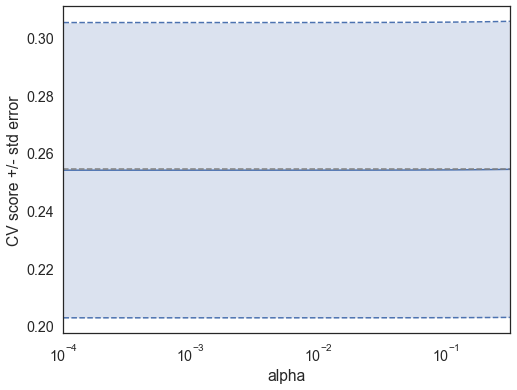

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.070
Date:                Tue, 08 Feb 2022   Prob (F-statistic):              0.302
Time:                        11:20:30   Log-Likelihood:                -807.21
No. Observations:                 192   AIC:                             1618.
Df Residuals:                     190   BIC:                             1625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3907      1.206     45.117      0.0

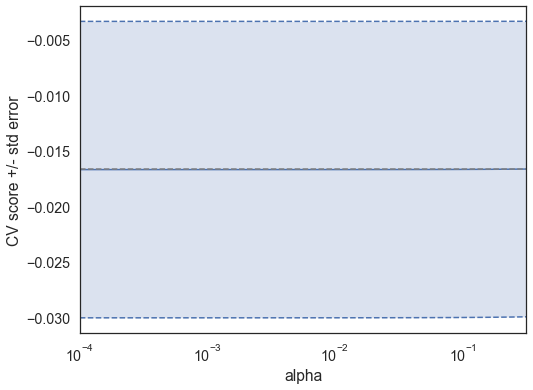

In [19]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
X['GP Punish']=betas_rfi_predator
X['MB Punish']=betas_pred
X['p1']=masq_scores
X['p2']=ocd_scores
X['AP']=stick
X['GP Reward']=betas_rfi_reward
X['MB Rew']=betas_safe
X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
X['MF']=beta_mf
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

Xt = X.values
y = worry_scores
lasso = Lasso(random_state=0, max_iter=10000)

ridge = Ridge(random_state=0, max_iter=10000)
ols_r=LinearRegression()
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
clf.fit(Xt, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()


from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame()
# X['GP Punish']=betas_rfi_predator
X['MB Punish']=betas_pred
# X['p1']=masq_scores
# X['p2']=ocd_scores
# X['AP']=stick
# X['GP Reward']=betas_rfi_reward
# X['MB Rew']=betas_safe
# X['lr_features']=lrs
# X['Ch Rwd']=safe_change
# X['Ch Pun']=pred_change
# X['MF']=beta_mf
X = sm.add_constant(X)
predc=worry_scores
rlm_model = sm.OLS(predc, X)
rlm_results = rlm_model.fit()
print(rlm_results.summary())
print('')

Xt = X.values
y = worry_scores

alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]


clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
clf.fit(Xt, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()
print('')

num significant: 111


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


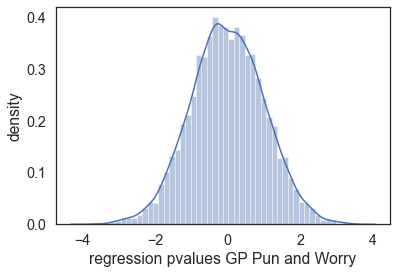

In [118]:
t_values=[]
significant=0
import random
for i in range(10000):
    X=pd.DataFrame()
    X['GP Punish']=betas_rfi_predator
    X['MB Punish']=betas_pred
    X['p1']=masq_scores
    X['p2']=ocd_scores
    X['AP']=stick
    X['GP Reward']=betas_rfi_reward
    X['MB Rew']=betas_safe
    X['lr_features']=lrs
    X['Ch Rwd']=safe_change
    X['Ch Pun']=pred_change
    X['MF']=beta_mf
    X = sm.add_constant(X)
    predc=random.sample(worry_scores,len(worry_scores))

    rlm_model = sm.OLS(predc, X)
    rlm_results = rlm_model.fit()
    if rlm_results.tvalues['GP Punish']>2.27:
        significant+=1

    t_values.append(rlm_results.tvalues['GP Punish'])


print('num significant: {}'.format(significant))
temp_f=pd.Series(t_values,name='regression pvalues GP Pun and Worry')
sns.distplot(temp_f)
plt.ylabel('density')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

Xt = X.values
y = y

X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree1.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)

# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 
print('')
print("DT train accuracy: %0.3f" % dtree1.score(X_train, y_train))
print("DT train accuracy: %0.3f" % dtree1.score(X_test, y_test))
# # Print RMSE and R-squared value for regression tree 'dtree2' on training data
# print(np.sqrt(mean_squared_error(y_train,tr2))) 
# print(r2_score(y_train, tr2))

# # Print RMSE and R-squared value for regression tree 'dtree2' on testing data
# print(np.sqrt(mean_squared_error(y_test,y2))) 
# print(r2_score(y_test, y2))   

# Difference in GP distributions

mean diff = 0.2440698030393632
median diff = 0.20057489713394083
384
t : 2.902762508395613, p: 0.0041340342829180605 diff Hueristic Rew - Pred



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


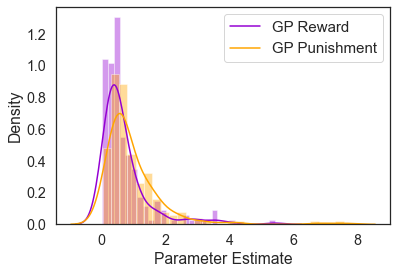

In [106]:
import pandas as pd
df=pd.DataFrame()
df=df.reset_index()
bp=np.exp(betas_rfi_predator).tolist()
bs=np.exp(betas_rfi_reward).tolist()

print('mean diff = {}'.format(np.mean((bp))-np.mean(bs)))
print('median diff = {}'.format(np.median(bp)-np.median(bs)))

sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.3, color_codes=True, rc=None)
print(len(bs+bp))
df['beta_weights']=bs+bp
df['type_feature']=['reward_betas']*192+['predator_betas']*192
beta_safe = df.loc[df['type_feature'] == 'reward_betas']
beta_pred = df.loc[df['type_feature'] == 'predator_betas']

sns.distplot(beta_safe[['beta_weights']],color='darkviolet' )
sns.distplot(beta_pred[['beta_weights']],color='orange')
plt.legend(('GP Reward', 'GP Punishment'),loc='upper right',prop={'size': 15})
plt.xlabel('Parameter Estimate')
plt.ylabel('Density')
t,p=tt_rel(bp,bs)
print('t : {}, p: {} diff Hueristic Rew - Pred'.format(t,p))
print('')
plt.savefig('GP_Distributions.png',bbox_inches='tight',dpi=300)
plt.show()

mean diff = -2.0191798085345187
median diff = -1.2806696031465141
384
t : -6.789368738056787, p: 1.3839431120353282e-10 diff MB Rew - Pred



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


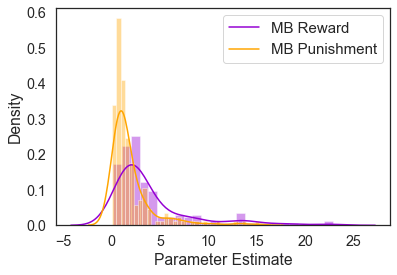

In [107]:
import pandas as pd
df=pd.DataFrame()
df=df.reset_index()
bp=np.exp(betas_pred).tolist()
bs=np.exp(betas_safe).tolist()

print('mean diff = {}'.format(np.mean((bp))-np.mean(bs)))
print('median diff = {}'.format(np.median(bp)-np.median(bs)))

sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.3, color_codes=True, rc=None)
print(len(bs+bp))
df['beta_weights']=bs+bp
df['type_feature']=['reward_betas']*192+['predator_betas']*192
beta_safe = df.loc[df['type_feature'] == 'reward_betas']
beta_pred = df.loc[df['type_feature'] == 'predator_betas']

sns.distplot(beta_safe[['beta_weights']],color='darkviolet' )
sns.distplot(beta_pred[['beta_weights']],color='orange')
plt.legend(('MB Reward', 'MB Punishment'),loc='upper right',prop={'size': 15})
plt.xlabel('Parameter Estimate')
plt.ylabel('Density')
t,p=tt_rel(bp,bs)
print('t : {}, p: {} diff MB Rew - Pred'.format(t,p))
print('')
plt.savefig('MB_Distributions.png',bbox_inches='tight',dpi=300)
plt.show()

# OCD analysis transition learning

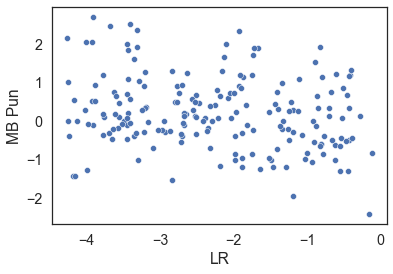

corr log space LR and MB Pun : -0.21624685530961574, pval: 0.002590498591659798


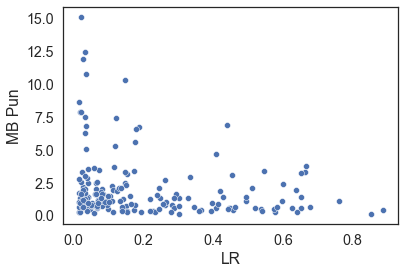

corr reg space LR and MB Pun : -0.16861504993389556, pval: 0.019392098517779125


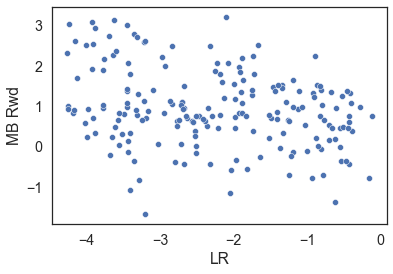

corr log space LR and MB Rwd : -0.28136813846716785, pval: 7.70284817017576e-05


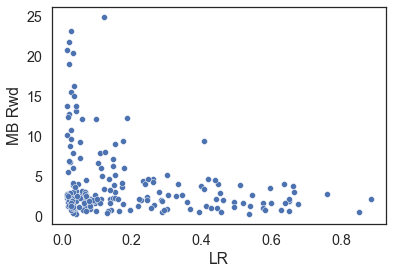

corr reg space LR and MB Pun : -0.2667366236634581, pval: 0.00018412071646015446
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.496
Date:                Sat, 11 Sep 2021   Prob (F-statistic):             0.0353
Time:                        10:33:45   Log-Likelihood:                -761.28
No. Observations:                 192   AIC:                             1527.
Df Residuals:                     190   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [7]:
from scipy.stats import pearsonr as corr

temp_f=pd.DataFrame()
temp_f['LR']=lrs
temp_f['MB Pun']=betas_pred
ax=sns.scatterplot(data=temp_f, x="LR", y="MB Pun")
# plt.savefig("LR_MBP_log.png",bbox_inches='tight',dpi=300)

plt.show()
r,p=corr(lrs,betas_pred)

print('corr log space LR and MB Pun : {}, pval: {}'.format(r,p))

temp_f=pd.DataFrame()
temp_f['LR']=np.exp(lrs)
temp_f['MB Pun']=np.exp(betas_pred)
ax=sns.scatterplot(data=temp_f, x="LR", y="MB Pun")
# plt.savefig("LR_MBR_nonlog.png",bbox_inches='tight',dpi=300)

plt.show()
r,p=corr(np.exp(lrs),np.exp(betas_pred))
print('corr reg space LR and MB Pun : {}, pval: {}'.format(r,p))

temp_f=pd.DataFrame()
temp_f['LR']=lrs
temp_f['MB Rwd']=betas_safe
ax=sns.scatterplot(data=temp_f, x="LR", y="MB Rwd")
# plt.savefig("LR_MBR_log.png",bbox_inches='tight',dpi=300)

plt.show()
r,p=corr(lrs,betas_safe)

print('corr log space LR and MB Rwd : {}, pval: {}'.format(r,p))

temp_f=pd.DataFrame()
temp_f['LR']=np.exp(lrs)
temp_f['MB Rwd']=np.exp(betas_safe)
ax=sns.scatterplot(data=temp_f, x="LR", y="MB Rwd")
# plt.savefig("LR_MBP_nonlog.png",bbox_inches='tight',dpi=300)
plt.show()

r,p=corr(np.exp(lrs),np.exp(betas_safe))
print('corr reg space LR and MB Pun : {}, pval: {}'.format(r,p))


#RUN OLS REGRESSIONS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm
sns.set(context='notebook', style='white', palette='deep', font='arial', font_scale=1.6, color_codes=True, rc=None)
from scipy import stats
sum_betas=[np.exp(betas_pred[i])+np.exp(betas_safe[i]) for i in range(len(betas_safe))]
# ax=sns.distplot(np.exp(lrs))

# plt.show()
# ax=sns.distplot(np.exp(betas_safe))
# plt.show()
# ax=sns.distplot(np.exp(betas_pred))
# plt.show()

X = pd.DataFrame()
ocd_scores_1=[ocd_scores[i]+1 for i in range(len(ocd_scores))]
X['LR Features']=lrs
X = sm.add_constant(X)

y=ocd_scores

rlm_model = sm.OLS(y,X)
rlm_results = rlm_model.fit()

print(rlm_results.summary())
X = pd.DataFrame()

X['MB Punish']=betas_pred

X = sm.add_constant(X)
y=ocd_scores

rlm_model = sm.OLS(y,X)
rlm_results = rlm_model.fit()

print(rlm_results.summary())

X = pd.DataFrame()

X['MB Reward']=betas_safe

X = sm.add_constant(X)
y=ocd_scores

rlm_model = sm.OLS(y,X)
rlm_results = rlm_model.fit()

print(rlm_results.summary())

X = pd.DataFrame()

X['GP Reward']=betas_rfi_reward

X = sm.add_constant(X)
y=ocd_scores

rlm_model = sm.OLS(y,X)
rlm_results = rlm_model.fit()

print(rlm_results.summary())

X = pd.DataFrame()
 
X['GP Punish']=betas_rfi_predator

X = sm.add_constant(X)
y=ocd_scores

rlm_model = sm.OLS(y,X)
rlm_results = rlm_model.fit()

print(rlm_results.summary())

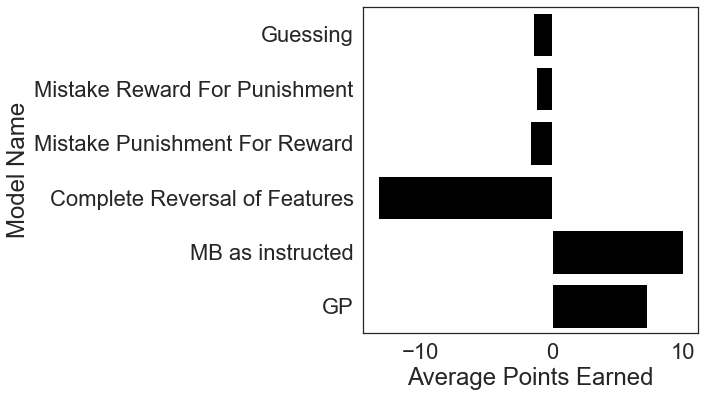

In [68]:
#pure guessing
mean1 = -1.4615
SD1 = 6.12
#treat reward as punishment:
mean2 = -1.1655
SD2 = 6.58
#treat punishment as reward
mean3 = -1.6695
SD3 = 6.526581781453443
#treat reward as punishment and punishment as reward
mean4 = -13.23
SD4 = 6.34
#treat as usual - MB only
mean5 = 9.99
SD5 = 6.54
#treat as usual - GP only
mean6 = 7.29
SD6 = 6.28

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQʀₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
  
# display subscript
MB_RR=('MB{}{}'.format(get_sub('R'),get_sub('R')))

sns.set(style='white', palette='Greys', font='arial', font_scale=2.0, rc=None)
df=pd.DataFrame()
points=[mean1,mean2,mean3,mean4,mean5,mean6]
# [38009.37073804648, 34676.46504166039, 34221.15410923616, 34025.5448863697, 33896.481327053836, 32938.79770167372]
df['Average Points Earned']=points
df['Model Name'] = ['Guessing','Mistake Reward For Punishment','Mistake Punishment For Reward',
                   'Complete Reversal of Features','MB as instructed','GP']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Average Points Earned", y="Model Name", data=df,
            label="Total", color="black")


plt.savefig("average_performance_different_mistakes.png",bbox_inches='tight', dpi=300)
plt.show()


## winning model

current_hyperparms:
[['mf', 'gamma', [1.1793640334581141, 0.5369025003731565]], ['lr_f', 'beta', [0.33390967325617393, 1.335234776059016]], ['pred_s', 'gamma', [0.5559512181723263, 7.333176683936292]], ['pred_b', 'gamma', [0.39748693461751083, 5.007985222864681]], ['lr_v', 'beta', [0.6328871445201135, 0.4169906140325281]], ['rew_ch', 'norm', [-0.13919093856157796, 1.0161465652368151]], ['pred_ch', 'norm', [0.5029814653831174, 1.0064168612073887]], ['lr_cf', 'beta', [0.18415468473958777, 1.0826983271474595]], ['gp_rew', 'gamma', [0.3991626874689032, 1.900070813232331]], ['gp_pred', 'gamma', [0.5964427628844873, 1.5803427320613188]], ['ap', 'norm', [0.1277201461041732, 0.5562989147634799]]]
final param info:
[32709.3833984]
